# Importing Libraries

In [2]:
import tensorflow as tf
import os
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import random

# Settings

In [3]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

# randomness
seed = 42
np.random.seed = seed

# Importing Dataset

In [4]:
# Data downloaded from - https://www.kaggle.com/competitions/data-science-bowl-2018/data 
#importing datasets

TRAIN_PATH = 'stage1_train'
TEST_PATH = 'stage1_test'

### Reading all the images present in the subfolder

In [6]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [7]:
train_ids

['00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552',
 '003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1',
 '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e',
 '0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed',
 '01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf',
 '0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21',
 '0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426',
 '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339',
 '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776',
 '03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe',
 '03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a',
 '0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd',
 '04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e',
 '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13',
 '0532c64c2fd0c4d3188cc751cdfd566b

# Training

In [8]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

# Resizing Images

In [9]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH+ '/' + id_ 
    print(path)
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

Resizing training images and masks


  0%|          | 0/670 [00:00<?, ?it/s]

stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552


  0%|          | 1/670 [00:00<07:06,  1.57it/s]

stage1_train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1


  0%|          | 2/670 [00:01<05:39,  1.97it/s]

stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e


  0%|          | 3/670 [00:02<08:22,  1.33it/s]

stage1_train/0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed


  1%|          | 5/670 [00:03<06:57,  1.59it/s]

stage1_train/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf
stage1_train/0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21


  1%|          | 6/670 [00:03<05:25,  2.04it/s]

stage1_train/0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426


  1%|          | 7/670 [00:04<06:22,  1.73it/s]

stage1_train/02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339


  1%|          | 8/670 [00:04<06:04,  1.82it/s]

stage1_train/03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776


  1%|▏         | 9/670 [00:05<05:23,  2.05it/s]

stage1_train/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe


  1%|▏         | 10/670 [00:06<08:09,  1.35it/s]

stage1_train/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a


  2%|▏         | 11/670 [00:06<07:12,  1.52it/s]

stage1_train/0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd


  2%|▏         | 12/670 [00:09<12:52,  1.17s/it]

stage1_train/04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e


  2%|▏         | 13/670 [00:10<12:27,  1.14s/it]

stage1_train/05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13


  2%|▏         | 14/670 [00:10<10:03,  1.09it/s]

stage1_train/0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275


  2%|▏         | 15/670 [00:11<08:42,  1.25it/s]

stage1_train/05a8f65ebd0b30d3b210f30b4d640c847c2e710d0d135e0aeeaccbe1988e3b6e


  2%|▏         | 16/670 [00:11<07:43,  1.41it/s]

stage1_train/06350c7cc618be442c15706db7a68e91f313758d224de4608f9b960106d4f9ca


  3%|▎         | 17/670 [00:12<06:46,  1.61it/s]

stage1_train/06c779330d6d3447be21df2b9f05d1088f5b3b50dc48724fc130b1fd2896a68c


  3%|▎         | 19/670 [00:12<05:05,  2.13it/s]

stage1_train/072ff14c1d3245bf49ad6f1d4c71cdb18f1cb78a8e06fd2f53767e28f727cb81
stage1_train/07761fa39f60dc37022dbbe8d8694595fd5b77ceb2af2a2724768c8e524d6770


  3%|▎         | 21/670 [00:13<03:14,  3.33it/s]

stage1_train/077f026f4ab0f0bcc0856644d99cbf639e443ec4f067d7b708bc6cecac609424
stage1_train/07fb37aafa6626608af90c1e18f6a743f29b6b233d2e427dcd1102df6a916cf5


  3%|▎         | 22/670 [00:22<32:06,  2.97s/it]

stage1_train/08151b19806eebd58e5acec7e138dbfbb1761f41a1ab9620466584ecc7d5fada


  3%|▎         | 23/670 [00:23<24:15,  2.25s/it]

stage1_train/08275a5b1c2dfcd739e8c4888a5ee2d29f83eccfa75185404ced1dc0866ea992


  4%|▎         | 25/670 [00:32<33:27,  3.11s/it]

stage1_train/08ae2741df2f5ac815c0f272a8c532b5167ee853be9b939b9b8b7fa93560868a
stage1_train/091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d


  4%|▍         | 26/670 [00:35<33:27,  3.12s/it]

stage1_train/094afe36759e7daffe12188ab5987581d405b06720f1d5acf3f2614f404df380


  4%|▍         | 27/670 [00:36<26:06,  2.44s/it]

stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9


  4%|▍         | 29/670 [00:37<14:21,  1.34s/it]

stage1_train/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe
stage1_train/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e


  4%|▍         | 30/670 [00:37<10:42,  1.00s/it]

stage1_train/0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93
stage1_train/0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe


  5%|▍         | 32/670 [00:38<07:44,  1.37it/s]

stage1_train/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6


  5%|▍         | 33/670 [00:38<06:54,  1.54it/s]

stage1_train/0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0


  5%|▌         | 34/670 [00:39<07:13,  1.47it/s]

stage1_train/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2


  5%|▌         | 35/670 [00:40<07:41,  1.38it/s]

stage1_train/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c


  5%|▌         | 36/670 [00:40<06:36,  1.60it/s]

stage1_train/0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c


  6%|▌         | 37/670 [00:40<05:36,  1.88it/s]

stage1_train/0d3640c1f1b80f24e94cc9a5f3e1d9e8db7bf6af7d4aba920265f46cadc25e37


  6%|▌         | 38/670 [00:41<05:00,  2.10it/s]

stage1_train/0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e


  6%|▌         | 39/670 [00:41<04:52,  2.16it/s]

stage1_train/0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e


  6%|▌         | 40/670 [00:42<04:35,  2.28it/s]

stage1_train/0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3


  6%|▌         | 41/670 [00:42<05:49,  1.80it/s]

stage1_train/0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f


  6%|▋         | 42/670 [00:43<05:09,  2.03it/s]

stage1_train/0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1


  6%|▋         | 43/670 [00:51<27:57,  2.68s/it]

stage1_train/1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d


  7%|▋         | 44/670 [00:51<20:46,  1.99s/it]

stage1_train/10328b822b836e67b547b4144e0b7eb43747c114ce4cacd8b540648892945b00


  7%|▋         | 45/670 [00:51<15:34,  1.49s/it]

stage1_train/10ba6cbee4873b32d5626a118a339832ba2b15d8643f66dddcd7cb2ec80fbc28


  7%|▋         | 47/670 [00:53<11:14,  1.08s/it]

stage1_train/11a0170f44e3ab4a8d669ae8ea9546d3a32ebfe6486d9066e5648d30b4e1cb69
stage1_train/12aeefb1b522b283819b12e4cfaf6b13c1264c0aadac3412b4edd2ace304cb40


  7%|▋         | 48/670 [00:55<15:19,  1.48s/it]

stage1_train/12f89395ad5d21491ab9cec137e247652451d283064773507d7dc362243c5b8e


  7%|▋         | 49/670 [00:56<13:17,  1.28s/it]

stage1_train/136000dc18fa6def2d6c98d4d0b2084d13c22eaffe82e26c665bcaa2a9e51261


  8%|▊         | 51/670 [00:57<07:41,  1.34it/s]

stage1_train/139946af9e2c7ef4f0298e622b831dbef5e5c0cd088eb5bc3382f8df9355443d
stage1_train/13c8ff1f49886e91c98ce795c93648ad8634c782ff57eb928ce29496b0425057


  8%|▊         | 52/670 [00:57<06:04,  1.70it/s]

stage1_train/13f2bec0a24c70345372febb14c4352877b1b6c1b01896246048e83c345c0914


  8%|▊         | 53/670 [00:57<05:10,  1.98it/s]

stage1_train/1400420310c9094361a8a243545187f1d4c2365e081b3bb08c5fa29c7491a55b


  8%|▊         | 54/670 [00:58<05:41,  1.80it/s]

stage1_train/14cc1424c59808274e123db51292e9dbb5b037ef3e7c767a8c45c9ac733b91bf


  8%|▊         | 55/670 [00:58<05:09,  1.99it/s]

stage1_train/15039b3acccc4257a1a442646a89b6e596b5eb4531637e6d8fa1c43203722c99


  8%|▊         | 56/670 [00:59<04:44,  2.16it/s]

stage1_train/150b0ffa318c87b31d78af0e87d60390dbcd84b5f228a8c1fb3225cbe5df3e3f


  9%|▊         | 57/670 [01:02<15:08,  1.48s/it]

stage1_train/1609b1b8480ee52652a644403b3f7d5511410a016750aa3b9a4c8ddb3e893e8e


  9%|▊         | 58/670 [01:03<11:16,  1.11s/it]

stage1_train/1631352dbafb8a90f11219fffd3bea368a30bc3bad3bbe0e84e19bd720df4945


  9%|▉         | 60/670 [01:03<06:56,  1.46it/s]

stage1_train/16c3d5935ba94b720becc24b7a05741c26149e221e3401924080f41e2f891368
stage1_train/1740b0a67ca337ea31648b57c81bcfbb841c7bb5cad185199a9f4da596d531b9


  9%|▉         | 61/670 [01:03<05:10,  1.96it/s]

stage1_train/175dbb364bfefc9537931144861c9b6e08934df3992782c669c6fe4234319dfc


  9%|▉         | 63/670 [01:07<09:44,  1.04it/s]

stage1_train/1815cf307859b3e13669041d181aa3b3dbbac1a95aef4c42164b223110c09168
stage1_train/193ffaa5272d5c421ae02130a64d98ad120ec70e4ed97a72cdcd4801ce93b066


 10%|▉         | 64/670 [01:10<15:50,  1.57s/it]

stage1_train/19f0653c33982a416feed56e5d1ce6849fd83314fd19dfa1c5b23c6b66e9868a


 10%|▉         | 65/670 [01:10<13:21,  1.32s/it]

stage1_train/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e


 10%|▉         | 66/670 [01:13<17:33,  1.74s/it]

stage1_train/1a75de9e11303142864efed27e69ea1960dbd82ca910de221a777ed2caf35a6b


 10%|█         | 68/670 [01:14<09:31,  1.05it/s]

stage1_train/1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b
stage1_train/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88


 10%|█         | 69/670 [01:14<07:08,  1.40it/s]

stage1_train/1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df


 10%|█         | 70/670 [01:19<20:12,  2.02s/it]

stage1_train/1b518cd2ea84a389c267662840f3d902d0129fab27696215db2488de6d4316c5


 11%|█         | 71/670 [01:21<19:42,  1.97s/it]

stage1_train/1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5


 11%|█         | 72/670 [01:21<15:33,  1.56s/it]

stage1_train/1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142d52bb7a186885f0


 11%|█         | 74/670 [01:22<08:58,  1.11it/s]

stage1_train/1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e
stage1_train/1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867


 11%|█         | 75/670 [01:23<08:24,  1.18it/s]

stage1_train/1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180


 11%|█▏        | 76/670 [01:26<14:43,  1.49s/it]

stage1_train/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e


 11%|█▏        | 77/670 [01:26<10:56,  1.11s/it]

stage1_train/1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd


 12%|█▏        | 78/670 [01:26<08:35,  1.15it/s]

stage1_train/1d5f4717e179a03675a5aac3fc1c862fb442ddc3e373923016fd6b1430da889b
stage1_train/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5


 12%|█▏        | 81/670 [01:26<04:10,  2.35it/s]

stage1_train/1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f
stage1_train/1e61ecf354cb93a62a9561db87a53985fb54e001444f98112ed0fc623fad793e
stage1_train/1e8408fbb1619e7a0bcdd0bcd21fae57e7cb1f297d4c79787a9d0f5695d77073


 12%|█▏        | 83/670 [01:27<03:06,  3.14it/s]

stage1_train/1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72


 13%|█▎        | 85/670 [01:27<02:42,  3.60it/s]

stage1_train/1ee4a111f0e0bb9b001121b94ff98ca736fad03797b25285fe33a47046b3e4b0
stage1_train/1f0008060150b5b93084ae2e4dabd160ab80a95ce8071a321b80ec4e33b58aca


 13%|█▎        | 86/670 [01:28<02:48,  3.47it/s]

stage1_train/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8


 13%|█▎        | 87/670 [01:30<09:12,  1.06it/s]

stage1_train/1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5


 13%|█▎        | 89/670 [01:31<06:53,  1.41it/s]

stage1_train/20468e8779c43e089dc0ff30f25e6cf3872d5aa6a0fdad6f8aca382da43e8582
stage1_train/20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f


 13%|█▎        | 90/670 [01:41<31:56,  3.31s/it]

stage1_train/20c37b1ad2f510ed7396969e855fe93d0d05611738f6e706e8ca1d1aed3ded45


 14%|█▎        | 91/670 [01:42<24:11,  2.51s/it]

stage1_train/20e209f6ffa120a72712e1b4c1d3e24d1339227e2936abd4bbd49a636fada423


 14%|█▎        | 92/670 [01:42<19:06,  1.98s/it]

stage1_train/212b858a66f0d23768b8e3e1357704fc2f4cf4bbe7eed8cd59b5d01031d553e6


 14%|█▍        | 94/670 [01:45<13:58,  1.46s/it]

stage1_train/21408476af0506331e8b5d49b385833e5ef1fbb90815fbf9af9d19b4bb145f76
stage1_train/220b37f4ca7cab486d2b71cd87a46ee7411a5aa142799d96ed98015ab5ba538a
stage1_train/2227fd9b01d67c2bcdb407d3205214e6dfeff9fd0725828e3b3651959942ff4a


 14%|█▍        | 96/670 [01:45<09:34,  1.00s/it]

stage1_train/2246874c8b5ba218d01ad8153a201ad4660195f3e4c65da6b9d4ccaf82cb7edf


 15%|█▍        | 98/670 [01:47<08:03,  1.18it/s]

stage1_train/2255d5aba044256bb92f6b7cbed0fca46d972c7b6b1a59dcbe7f682c5777d074


 15%|█▍        | 99/670 [01:47<06:09,  1.54it/s]

stage1_train/2349e95ece2857c89db7e4a8be8c88af0b45f3c4262608120cb3bd6ef51fd241
stage1_train/237802ac5005f9cf782367156c46c383efd9e05088e5768ca883cbbe24abadb1


 15%|█▍        | 100/670 [01:47<04:43,  2.01it/s]

stage1_train/23830d0e51245fc0c9e410efa4c17d2a7d83a0104a3777130119ab892de47a4e


 15%|█▌        | 101/670 [01:48<04:37,  2.05it/s]

stage1_train/243443ae303cc09cfbea85bfd22b0c4f026342f3dfc3aa1076f27867910d025b


 15%|█▌        | 102/670 [01:48<05:07,  1.85it/s]

stage1_train/245b995878370ef4ea977568b2b67f93d4ecaa9308761b9d3e148e0803780183


 15%|█▌        | 103/670 [01:49<05:05,  1.85it/s]

stage1_train/24a20f2a529cede5695df2422a3986505b5826bb10b10781d6db2074cf3de7b3


 16%|█▌        | 104/670 [01:49<04:36,  2.05it/s]

stage1_train/27c30f9011492f234e4587c9a4b53c787037d486f658821196fe354240ac3c47


 16%|█▌        | 106/670 [01:50<03:31,  2.66it/s]

stage1_train/2817299fd3b88670e86a9db5651ba24333c299d1d41e5491aabfcd95aee84174
stage1_train/2869fad54664677e81bacbf00c2256e89a7b90b69d9688c9342e2c736ff5421c


 16%|█▌        | 107/670 [01:50<03:11,  2.94it/s]

stage1_train/28d33efef218392e79e385906deb88055d94b65ad217de78c07e85476f80f45a


 16%|█▌        | 108/670 [01:51<03:57,  2.37it/s]

stage1_train/295ac4ecf2ee0211c065cf5dbb93b1eb8e61347153447209cd110e9c3e355e81


 16%|█▋        | 109/670 [01:51<03:25,  2.73it/s]

stage1_train/29780b28e6a75fac7b96f164a1580666513199794f1b19a5df8587fe0cb59b67


 16%|█▋        | 110/670 [01:51<03:20,  2.79it/s]

stage1_train/29dd28df98ee51b4ab1a87f5509538ecc3e4697fc57c40c6165658f61b0d8e3a


 17%|█▋        | 111/670 [01:52<04:03,  2.30it/s]

stage1_train/29ea4f6eb4545f43868a9b40a60000426bf8dfd9d062546656a37bd2a2aaf9ec


 17%|█▋        | 112/670 [01:52<03:35,  2.59it/s]

stage1_train/2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812


 17%|█▋        | 113/670 [01:55<10:50,  1.17s/it]

stage1_train/2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365


 17%|█▋        | 114/670 [01:55<08:19,  1.11it/s]

stage1_train/2ab91a4408860ae8339689ed9f87aa9359de1bdd4ca5c2eab7fff7724dbd6707


 17%|█▋        | 115/670 [01:56<07:43,  1.20it/s]

stage1_train/2abc40c118bc7303592c8bb95a80361e27560854b8971ab34dcf91966575b1f2


 17%|█▋        | 117/670 [01:57<04:50,  1.91it/s]

stage1_train/2ad489c11ed8b77a9d8a2339ac64ffc38e79281c03a2507db4688fd3186c0fe5
stage1_train/2b50b1e3fa5c5aa39bc84ebfaea9961b7199c4d2488ae0b48d0b3459807d59d2


 18%|█▊        | 118/670 [01:57<03:47,  2.43it/s]

stage1_train/2bf594e9d06f78b4b79d7ffb395497a0a91126b6b0d710d7a9cee21f5c3bd177


 18%|█▊        | 119/670 [01:57<03:34,  2.57it/s]

stage1_train/2c61fdcb36fd1b2944895af6204279e9f6c164ba894198b40c8b7a3c9bf500ea


 18%|█▊        | 120/670 [01:57<03:26,  2.67it/s]

stage1_train/2c83c86dd4e5dacc024b55629375567fb8e320a82ef86f541cfe54764040fc25


 18%|█▊        | 121/670 [01:58<03:42,  2.47it/s]

stage1_train/2c840a94d216f5ef4e499b53ae885e9b022cbf639e004ec788436093837823b2


 18%|█▊        | 122/670 [01:58<03:15,  2.81it/s]

stage1_train/2cfa61bef6542dd359717e9131ce6f076c415a3bd7f48cb093b0d7f3b2ca785d


 19%|█▊        | 124/670 [02:00<06:09,  1.48it/s]

stage1_train/2cfa857e63be1b418c91ad5ea1f8d136fd1b80fc856e1d4277274c3dea28011c
stage1_train/2d53d7ec0c579fffd6710c956288537d46c719a93c6a04ac0d6550f75a6a6493


 19%|█▊        | 125/670 [02:01<04:53,  1.86it/s]

stage1_train/2dd3356f2dcf470aec4003800744dfec6490e75d88011e1d835f4f3d60f88e7a


 19%|█▉        | 126/670 [02:02<06:53,  1.32it/s]

stage1_train/2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb5acb7fb352f7030063


 19%|█▉        | 127/670 [02:02<05:20,  1.69it/s]

stage1_train/2dec81a678ddcac2b110acffe82427d857695180bd841e3f9736a554acf832af


 19%|█▉        | 128/670 [02:03<05:10,  1.75it/s]

stage1_train/2e172afb1f43b359f1f0208da9386aefe97c0c1afe202abfe6ec09cdca820990


 19%|█▉        | 129/670 [02:03<04:43,  1.91it/s]

stage1_train/2e2d29fc44444a85049b162eb359a523dec108ccd5bd75022b25547491abf0c7


 19%|█▉        | 130/670 [02:03<04:01,  2.24it/s]

stage1_train/2f929b067a59f88530b6bfa6f6889bc3a38adf88d594895973d1c8b2549fd93d


 20%|█▉        | 131/670 [02:04<04:20,  2.07it/s]

stage1_train/30311520606ec99b6a810ae1a9a753df991777d374212423bb075c408a98ed74


 20%|█▉        | 133/670 [02:05<03:23,  2.64it/s]

stage1_train/305a8baaf726d7c9e695bff31d3a6a61445999a4732f0a3e6174dc9dcbe43931
stage1_train/308084bdd358e0bd3dc7f2b409d6f34cc119bce30216f44667fc2be43ff31722


 20%|██        | 135/670 [02:05<03:07,  2.85it/s]

stage1_train/309ba76b12ecb5ce28b99f3445b2b5dc54c0564c3c0e24c17e4c89a94a5d0535
stage1_train/30f65741053db713b3f328d31d3234b6fedbe31df65c1a8ea29be28146cab789


 20%|██        | 136/670 [02:06<02:56,  3.03it/s]

stage1_train/317832f90f02c5e916b2ac0f3bcb8da9928d8e400b747b2c68e544e56adacf6b


 20%|██        | 137/670 [02:06<03:08,  2.83it/s]

stage1_train/319b6cb8b0d24b38db5e3c6fbb13b062e2766d9af5ff9bccb8f439ac0d870e52


 21%|██        | 138/670 [02:07<03:58,  2.23it/s]

stage1_train/33618678c167c5e07be02c49d0c43bcd90493ba5d83110a631409a4d3ccc1e51


 21%|██        | 139/670 [02:07<03:44,  2.37it/s]

stage1_train/337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf


 21%|██        | 140/670 [02:08<04:24,  2.01it/s]

stage1_train/33a5b0ff232b425796ee6a9dd5b516ff9aad54ca723b4ec490bf5cd9b2e2a731


 21%|██        | 142/670 [02:08<03:05,  2.84it/s]

stage1_train/33d0a9b24c25852ce35274b4b1777484ccd21f44dbe35491cc926e5948c1ce3e
stage1_train/3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225


 21%|██▏       | 143/670 [02:08<03:08,  2.80it/s]

stage1_train/3477024fd843e46097840360f9cdee24b76bf5c593ed27a9aee7a5728a06aa51


 22%|██▏       | 145/670 [02:09<02:45,  3.16it/s]

stage1_train/34c9f4eb2af8b8f46b1d88b74bde16f4614cd08948c2f1d817eb629afc512e7a
stage1_train/351771edfc5db5665ded8aa4940257276b6526663c76e3b60b92a52584d8943c


 22%|██▏       | 146/670 [02:11<06:37,  1.32it/s]

stage1_train/353ab00e964f71aa720385223a9078b770b7e3efaf5be0f66e670981f68fe606


 22%|██▏       | 147/670 [02:11<06:10,  1.41it/s]

stage1_train/356d9903d16074f152fe8f2f0ef555d9959c53264228eae7373cad5cf35d4e85


 22%|██▏       | 148/670 [02:12<05:50,  1.49it/s]

stage1_train/3582166ee20755856adf4882a8bfacb616fce4247911605a109c4862de421bcd


 22%|██▏       | 149/670 [02:13<05:29,  1.58it/s]

stage1_train/358e47eaa1e9222252793fe0fb8c77028d4e0d4360b95a07c9fe6df6a2066556


 22%|██▏       | 150/670 [02:13<05:10,  1.68it/s]

stage1_train/3594684b9ea0e16196f498815508f8d364d55fea2933a2e782122b6f00375d04


 23%|██▎       | 151/670 [02:16<11:00,  1.27s/it]

stage1_train/35ca5f142a7d7a3e4b59f1a767a31f87cb00d66348226bc64094ee3d1e46531c


 23%|██▎       | 153/670 [02:17<06:42,  1.28it/s]

stage1_train/371a67232f7c871ec11332292c83cd9bb16063b91d58e86f0b76ef8817bc9465
stage1_train/37ed50eea5a1e0bade3e6753793b6caeb061cd4c2f365658c257f69cab1f6288


 23%|██▎       | 154/670 [02:17<05:39,  1.52it/s]

stage1_train/3852c7e45bd885b9537e276861ab50b99bb42f0f8e717d2f88174c62862ca3ff


 23%|██▎       | 156/670 [02:18<04:25,  1.94it/s]

stage1_train/3874755f6222e83006fdad4d664ec0d9697c13af4fbe24b2f9a059bb13075186
stage1_train/3934a094e8537841e973342c7f8880606f7a2712b14930340d6f6c2afe178c25


 23%|██▎       | 157/670 [02:19<05:09,  1.66it/s]

stage1_train/3a22fe593d9606d4f137461dd6802fd3918f9fbf36f4a65292be69670365e2ca


 24%|██▎       | 158/670 [02:19<04:12,  2.03it/s]

stage1_train/3a3fee427e6ef7dfd0d82681e2bcee2d054f80287aea7dfa3fa4447666f929b9


 24%|██▎       | 159/670 [02:20<04:35,  1.86it/s]

stage1_train/3a508d2dc03db46e7f97a2a30eabb62ab2886f3cedfea303de8f6a42e50d20eb


 24%|██▍       | 160/670 [02:20<03:47,  2.24it/s]

stage1_train/3ab9cab6212fabd723a2c5a1949c2ded19980398b56e6080978e796f45cbbc90


 24%|██▍       | 162/670 [02:20<02:48,  3.02it/s]

stage1_train/3b0709483b1e86449cc355bb797e841117ba178c6ae1ed955384f4da6486aa20
stage1_train/3b3f516ebc9a16cff287a5ffd3a1861a345a6d38bedbba74f1c0b0e0eac62afd


 24%|██▍       | 163/670 [02:21<03:04,  2.75it/s]

stage1_train/3b75fc03a1d12b29bd2870eb1f6fdb44174dbd1118dfc11c31f127bd87bd27ef
stage1_train/3b957237bc1e09740b58a414282393d3a91dde996b061e7061f4198fb03dab2e


 25%|██▍       | 165/670 [02:21<02:22,  3.55it/s]

stage1_train/3bf7873f11823f4b64422f49c8248dd95c0d01f9ae9075ae3d233bbb21a3d875


 25%|██▍       | 166/670 [02:22<03:18,  2.54it/s]

stage1_train/3bfa8b3b01fd24a28477f103063d17368a7398b27331e020f3a0ef59bf68c940


 25%|██▍       | 167/670 [02:23<04:35,  1.82it/s]

stage1_train/3bfd6bb152310f93daa6f4e1867c10572946e874b3a30c9ba8e0fcdeb590300b


 25%|██▌       | 168/670 [02:23<04:12,  1.99it/s]

stage1_train/3ca8181367fc1258a418f7bf5044533c83e02a59c1a96def043295c429c297a8


 25%|██▌       | 169/670 [02:23<03:40,  2.27it/s]

stage1_train/3d0ca3498d97edebd28dbc7035eced40baa4af199af09cbb7251792accaa69fe
stage1_train/3ebd2ab34ba86e515feb79ffdeb7fc303a074a98ba39949b905dbde3ff4b7ec0


 26%|██▌       | 171/670 [02:26<07:31,  1.11it/s]

stage1_train/3f9fc8e63f87e8a56d3eaef7db26f1b6db874d19f12abd5a752821b78d47661e


 26%|██▌       | 173/670 [02:29<08:52,  1.07s/it]

stage1_train/40946065f7e4b6038599fbfd419f2a67e7635b6f89db3ed6c0d67c8801521af1
stage1_train/40b00d701695d8ea5d59f95ac39e18004040c96d17fbc1a539317c674eca084b


 26%|██▌       | 175/670 [02:30<05:47,  1.42it/s]

stage1_train/40bcdad218ac5f0885fc247d88fcad9f729f55c81c79d241a8f1559b6d8c0574
stage1_train/4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a


 26%|██▋       | 177/670 [02:31<04:09,  1.98it/s]

stage1_train/4193474b2f1c72f735b13633b219d9cabdd43c21d9c2bb4dfc4809f104ba4c06
stage1_train/420f43d21dbaba42bf8c0995b3a2c85537876d594433770c6c6f3d6b779ec15f


 27%|██▋       | 178/670 [02:31<04:13,  1.94it/s]

stage1_train/4217e25defac94ff465157d53f5a24b8a14045b763d8606ec4a97d71d99ee381


 27%|██▋       | 180/670 [02:39<14:38,  1.79s/it]

stage1_train/431b9b0c520a28375b5a0c18d0a5039dd62cbca7c4a0bcc25af3b763d4a81bec
stage1_train/4327d27591871e9c8d317071a390d1b3dcedad05a9746175b005c41ea0d797b2


 27%|██▋       | 181/670 [02:39<11:57,  1.47s/it]

stage1_train/43cf6b2ec0b0745ac2b87b4d8780f62e9050d3f5d50a1fcefa42d166191e84c6


 27%|██▋       | 182/670 [02:40<09:42,  1.19s/it]

stage1_train/442c4eb0185698fe7d148c108a46f74abd399aecda2f4f22981a1671cd95dd7d


 27%|██▋       | 183/670 [02:40<07:18,  1.11it/s]

stage1_train/449a9c32e53a37c8a86e01c199155c8da3958b631088e10f6fe43c2119defe51


 27%|██▋       | 184/670 [02:41<07:57,  1.02it/s]

stage1_train/449f41710769584b5e4eca8ecb4c76d5272605f27da2949e6285de0860d2cbc0


 28%|██▊       | 185/670 [02:42<07:29,  1.08it/s]

stage1_train/449fe932622db3b49366a260ddd20077219f96fb2dc0f912ad4f60b087876f3b


 28%|██▊       | 186/670 [02:43<06:47,  1.19it/s]

stage1_train/44ab6a09eedee848b072ea3acd0f4e781f9c43b8d4e3d62598e1024584bf0b01


 28%|██▊       | 187/670 [02:43<06:17,  1.28it/s]

stage1_train/4590d7d47f521df62f3bcb0bf74d1bca861d94ade614d8afc912d1009d607b94


 28%|██▊       | 188/670 [02:45<07:51,  1.02it/s]

stage1_train/4596961c789d3b41916492918797724fe75128239fefc516c3ee75322b7926f0


 28%|██▊       | 189/670 [02:48<14:30,  1.81s/it]

stage1_train/45c3bdef1819ba7029990e159f61543ed25781d13fb4dc5d4de52e803debd7d3


 28%|██▊       | 190/670 [02:49<10:48,  1.35s/it]

stage1_train/45cc00f2ef95da6698bf590663e319d7c0ed4fb99d42dd3cf4060887da74fb81


 29%|██▊       | 192/670 [02:49<06:04,  1.31it/s]

stage1_train/45f059cf21d85ecfce0eb93260516f1e2443d210e9a52f9ae2271d604aa3fcc5


 29%|██▉       | 194/670 [02:49<03:36,  2.20it/s]

stage1_train/4829177d0b36abdd92c4ef0c7834cbc49f95232076bdd7e828f1f7cbb5ed80ec
stage1_train/483b89aa683542f1c63e62f5f71ae8ae1f959caf1c379cd61230a71cd1036732
stage1_train/4948e3dfe0483c2198b9616612071ead5474dffd223071cf0a567aea9aca0b9e


 29%|██▉       | 195/670 [02:50<03:17,  2.41it/s]

stage1_train/49edc2f7715100fb0390916e52b3fd11a921f02e59509dc987f67840a36250fc


 29%|██▉       | 196/670 [02:51<06:00,  1.31it/s]

stage1_train/4a424e0cb845cf6fd4d9fe62875552c7b89a4e0276cf16ebf46babe4656a794e


 29%|██▉       | 197/670 [02:52<05:21,  1.47it/s]

stage1_train/4ae4f936a9ade472764dad80f60f7168e4be067aa66ce9d06d60ebe34951dca4


 30%|██▉       | 199/670 [02:52<03:33,  2.20it/s]

stage1_train/4b274461c6d001a7a9aeaf5952b40ac4934d1be96b9c176edfd628a8f77e6df2
stage1_train/4bf6a5ec42032bb8dbbb10d25fdc5211b2fe1ce44b6e577ef89dbda17697d819


 30%|██▉       | 200/670 [02:53<03:08,  2.50it/s]

stage1_train/4c032609d377bd980e01f888e0b298600bf8af0e33c4271a1f3aaf76964dce06


 30%|███       | 201/670 [02:53<02:47,  2.80it/s]

stage1_train/4c465a54e329ec7b0f4bc5f6acdfd3192707d6c0fbdf557339485581c5a6b3c1


 30%|███       | 202/670 [02:54<03:35,  2.17it/s]

stage1_train/4ca5081854df7bbcaa4934fcf34318f82733a0f8c05b942c2265eea75419d62f


 30%|███       | 204/670 [02:54<02:41,  2.88it/s]

stage1_train/4cbd6c37f3a55a538d759d440344c287cac66260d3047a83f429e63e7a0f7f20
stage1_train/4d09672bcf5a2661eea00891bbb8191225a06619a849aece37ad10d9dedbde3e


 31%|███       | 205/670 [02:55<03:48,  2.03it/s]

stage1_train/4d14a3629b6af6de86d850be236b833a7bfcbf6d8665fd73c6dc339e06c14607


 31%|███       | 206/670 [02:56<04:20,  1.78it/s]

stage1_train/4d2cff9a0c8df3a7ef6100fda6f66e865a7670af6a18564767d8019b9ed2fd7b


 31%|███       | 207/670 [02:58<08:42,  1.13s/it]

stage1_train/4d40de30a3db3bc4f241cb7f48e8497c11e8f20a99bf55788bdce17242029745


 31%|███       | 208/670 [02:58<06:35,  1.17it/s]

stage1_train/4d4ebfcae4374165ea6ae7c7e18fd0ba5014c3c860ee2489c59e25ddd45e7a32


 31%|███▏      | 210/670 [02:59<04:19,  1.77it/s]

stage1_train/4d4f254f3b8b4408d661df3735591554b2f6587ce1952928d619b48010d55467
stage1_train/4dbbb275960ab9e4ec2c66c8d3000f7c70c8dce5112df591b95db84e25efa6e9


 31%|███▏      | 211/670 [03:03<11:15,  1.47s/it]

stage1_train/4e07a653352b30bb95b60ebc6c57afbc7215716224af731c51ff8d430788cd40


 32%|███▏      | 212/670 [03:15<35:17,  4.62s/it]

stage1_train/4e1c889de3764694d0dea41e5682fedb265eaf2cdbe72ff6c1f518747d709464


 32%|███▏      | 213/670 [03:16<27:57,  3.67s/it]

stage1_train/4e23ecf65040f86420e0201134e538951acdeda84fbb274311f995682044dd64


 32%|███▏      | 214/670 [03:16<20:32,  2.70s/it]

stage1_train/4e92129f4e8066d6f560d6022cd343a2245939aa49d8b06cddbd9bfc7e7eeb0e


 32%|███▏      | 215/670 [03:17<16:07,  2.13s/it]

stage1_train/4ee5850b63549794eb3ecd3d5f5673164ac16936e36ecc3700da886e3b616149


 32%|███▏      | 217/670 [03:19<10:47,  1.43s/it]

stage1_train/4ff152d76db095f75c664dd48e41e8c9953fd0e784535883916383165e28a08e
stage1_train/50a7ea80dd73232a17f98b5c83f62ec89989e892fe25b79b36f99b3872a7d182


 33%|███▎      | 218/670 [03:19<08:27,  1.12s/it]

stage1_train/514ccfc78cb55988a238d3ac9dc83460aa88382c95d56bcc0559962d9fe481ef


 33%|███▎      | 219/670 [03:20<06:51,  1.10it/s]

stage1_train/516a0e20327d6dfcedcf57e3056115e4fb29cdf4cb349003bdfc75c9b7f5c2cf


 33%|███▎      | 221/670 [03:20<04:29,  1.66it/s]

stage1_train/52a4ac5a875be7a6c886035d54fb63f5f397dc43508c4831898f6b2f8debc7f3
stage1_train/52a6b8ae4c8e0a8a07a31b8e3f401d8811bf1942969c198e51dfcbd98520aa60


 33%|███▎      | 222/670 [03:21<04:03,  1.84it/s]

stage1_train/538b7673d507014d83af238876e03617396b70fe27f525f8205a4a96900fbb8e


 33%|███▎      | 223/670 [03:32<28:19,  3.80s/it]

stage1_train/53ad09e4348767bece0165884bf40c10b72ae18444e3f414a850442f02385efc


 34%|███▎      | 225/670 [03:36<19:41,  2.66s/it]

stage1_train/5419302571113e9aa74c7c0a9575333ca539b871a16c86ee92b35170b4ddc52e
stage1_train/54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12


 34%|███▎      | 226/670 [03:40<23:38,  3.19s/it]

stage1_train/547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6


 34%|███▍      | 227/670 [03:45<27:33,  3.73s/it]

stage1_train/5488e8df5440ee5161fdfae3aeccd2ee396636430065c90e3f1f73870a975991


 34%|███▍      | 228/670 [03:46<20:24,  2.77s/it]

stage1_train/54cb3328e778d87f76062b0550e3bc190f46384acd8efbe58c297265d1906e84


 34%|███▍      | 229/670 [03:46<15:21,  2.09s/it]

stage1_train/54fe2d3416951cbc48f8718624c86a7ae58b6022a7fa75591b13f625cf53658b


 34%|███▍      | 230/670 [03:47<11:29,  1.57s/it]

stage1_train/55f98f43c152aa0dc8bea513f8ba558cc57494b81ae4ee816977816e79629c50


 34%|███▍      | 231/670 [03:47<08:45,  1.20s/it]

stage1_train/55ff2b0ec48b76e10c7ee18add5794005cd551697f96af865c763d50da78dd9c


 35%|███▍      | 232/670 [03:47<06:44,  1.08it/s]

stage1_train/564fa390d9a9c26f986bf860d9091cbd84244bc1c8e3c9369f2f2e5b5fd99b92


 35%|███▍      | 233/670 [03:48<06:37,  1.10it/s]

stage1_train/56d0da5b663ddd49955478c00ca03118c367ff7dd6a646b8c875b0acb207d1c5


 35%|███▍      | 234/670 [03:49<05:25,  1.34it/s]

stage1_train/573a657d5e5fcb9574a758b0ab34b09c79d7ba374ceb71227c3dc88f009a3f6b


 35%|███▌      | 236/670 [03:49<03:35,  2.01it/s]

stage1_train/573e1480b500c395f8d3f1800e1998bf553af0d3d43039333d33cf37d08f64e5
stage1_train/57b49733c5a3c268b013553635a826e6a1b10e699bbd19c3b842375fe0adf344


 35%|███▌      | 237/670 [03:49<02:56,  2.45it/s]

stage1_train/57bd029b19c1b382bef9db3ac14f13ea85e36a6053b92e46caedee95c05847ab
stage1_train/57d88f45e479ce3821839b2706d667758c63ac769d76800d815c73d2507c1e42


 36%|███▌      | 240/670 [03:50<01:48,  3.95it/s]

stage1_train/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd
stage1_train/589f86dee5b480a88dd4f77eeaffe2c4d70aefdf879a4096dde1fa4d41055b8f
stage1_train/58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921
stage1_train/58cc121d37fb7f1b4a5252024d88415936781e540252b8f734faeedd29b682d5


 36%|███▋      | 243/670 [03:50<01:13,  5.83it/s]

stage1_train/5908488d940e846cc121c768758da9b1bd5b9922417e20c9101a4e254fa98af8


 36%|███▋      | 244/670 [03:50<01:25,  4.97it/s]

stage1_train/5953af5080d981b554529971903d8bee9871457a4361b51f04ba04f43793dd8f


 37%|███▋      | 245/670 [03:51<01:27,  4.87it/s]

stage1_train/5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3


 37%|███▋      | 247/670 [03:55<06:03,  1.16it/s]

stage1_train/5afcbfd0dd64392aa1e233b996d0bfb4354ee7119f30ae111c33d0fe4df11590
stage1_train/5b0bde771bc67c505d1b59405cbcad0a2766ec3ee4e35852e959552c1b454233


 37%|███▋      | 249/670 [03:55<03:43,  1.88it/s]

stage1_train/5b12df18e4ae4df5af06052584cf0e6bef58ee2a220653890636eef88a944e14
stage1_train/5b2ccfb94dedf2ec8797c0404fc324888e35ab903c41bb26f070552033ca8e6c


 37%|███▋      | 251/670 [03:55<02:43,  2.56it/s]

stage1_train/5ba4facefc949c920d7054813a3e846b000969da2ed860148bdfd18456f59bcc
stage1_train/5bb8508ff8ec8683fc6a8aa6bd470f6feb3af4eccdca07f51a1ebc9dad67cfb8


 38%|███▊      | 253/670 [03:56<02:18,  3.02it/s]

stage1_train/5bda829acd824821bc1f3f6573cf065d364653d5322f033a4af943f7a6170566
stage1_train/5c235b945b25b9905b9b0429ce59f1db51d0d0c7d48c2c21ab9f3ca54b0715e6


 38%|███▊      | 254/670 [03:56<01:59,  3.48it/s]

stage1_train/5c6eb9a47852754d4e45eceb9a696c64c7cfe304afc5ea491cdfef11d55c17f3


 38%|███▊      | 256/670 [03:56<01:37,  4.26it/s]

stage1_train/5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856
stage1_train/5d21acedb3015c1208b31778561f8b1079cca7487399300390c3947f691e3974


 38%|███▊      | 257/670 [03:57<02:27,  2.80it/s]

stage1_train/5d2c98fd6fda3c7d739461c3b3d4a0c7f8456121a14519dc5955a1775227b053


 39%|███▊      | 258/670 [03:57<02:16,  3.03it/s]

stage1_train/5d58600efa0c2667ec85595bf456a54e2bd6e6e9a5c0dff42d807bc9fe2b822e


 39%|███▊      | 259/670 [04:02<10:05,  1.47s/it]

stage1_train/5d75a63972ef643efd7c42f20668b167f2af43635d6263962d84e62e7609ab51


 39%|███▉      | 261/670 [04:02<05:52,  1.16it/s]

stage1_train/5ddbfba2519484316e4b7ccabfa605e6e6fd96c3d87ac8cdfd2c134571a15311
stage1_train/5e263abff938acba1c0cff698261c7c00c23d7376e3ceacc3d5d4a655216b16d


 39%|███▉      | 262/670 [04:06<11:25,  1.68s/it]

stage1_train/5ef4442e5b8b0b4cf824b61be4050dfd793d846e0a6800afa4425a2f66e91456


 39%|███▉      | 263/670 [04:06<08:36,  1.27s/it]

stage1_train/5f9d29d6388c700f35a3c29fa1b1ce0c1cba6667d05fdb70bd1e89004dcf71ed


 39%|███▉      | 264/670 [04:08<09:38,  1.43s/it]

stage1_train/602f267432e7a573e1092f1cf48135c82d0fbc8722bc028b9330ec801a40bb18


 40%|███▉      | 266/670 [04:08<05:25,  1.24it/s]

stage1_train/6034456567632f4b48dc3dfbb98534b5953c151990f4235df6c912c0a9c08397
stage1_train/608ff81c8a0c8b622f6648a9c7f935d85f0c503f515ef2ac3728387be1953ee8
stage1_train/60cb718759bff13f81c4055a7679e81326f78b6a193a2d856546097c949b20ff


 40%|████      | 268/670 [04:09<03:12,  2.09it/s]

stage1_train/610f32e2d9d270d740aec501dcf0c89595e4e623468ad43272adab90520a8f96


 40%|████      | 270/670 [04:09<02:26,  2.73it/s]

stage1_train/615985773f1469fbc00915b3e82d1d4942051c09ddea2667e37ad361ed2e9d59
stage1_train/619429303c1af7540916509fe7900cf483eba4391b06aac87ff7f66ca1ab6483


 41%|████      | 272/670 [04:09<01:47,  3.71it/s]

stage1_train/61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008470e7db807585f9510
stage1_train/61dc249314d7b965eb4561ec739eab9b0f60af55c97b25ced8cb2a42a0be128e


 41%|████      | 273/670 [04:11<03:40,  1.80it/s]

stage1_train/62057502c387145ed4f8f7f0d5e5bedcb72d3bcec15fa71cb0310dee32871461


 41%|████      | 275/670 [04:12<03:55,  1.68it/s]

stage1_train/623cf6987b3fac8f384c09f40d98c5e739c097aa9a9627054542aa27f7d38db1
stage1_train/62570c4ff1c5ab6d9d383aba9f25e604768520b4266afd40fdf4734a694c8bc3
stage1_train/63d981a107091e1e3059102ce08870744dde173afe324bc2274c17d42f661778


 41%|████▏     | 277/670 [04:12<02:28,  2.65it/s]

stage1_train/648636ee314d7bdba3ab2fc0fe49a863de35c3e2caf619039f678df67b526868


 41%|████▏     | 278/670 [04:13<02:38,  2.47it/s]

stage1_train/64eeef16fdc4e26523d27bfa71a1d38d2cb2e4fa116c0d0ea56b1322f806f0b9


 42%|████▏     | 279/670 [04:13<02:40,  2.43it/s]

stage1_train/65c8527c16a016191118e8adc3d307fe3a73d37cbe05597a95aebd75daf8d051


 42%|████▏     | 281/670 [04:14<02:23,  2.71it/s]

stage1_train/66236902b874b7e4b3891db63a69f6d56f6edcec6aca7ba3c6871d73e7b4c34f
stage1_train/66612c188d73e931e1863af2c99d2af782c32f65fd97d224abb40bbadb87263f


 42%|████▏     | 283/670 [04:14<01:34,  4.08it/s]

stage1_train/670ebd9d674be236b9bf0b28650ad3f68e1891b06e16a9021fd069ca7ef32b78
stage1_train/673baf65ae5c571d6be452eb41e79ef3fc2eb3fd238e621c6b7621763b429989


 43%|████▎     | 285/670 [04:14<01:22,  4.65it/s]

stage1_train/68f833de9f8c631cedd7031b8ed9b908c42cbbc1e14254722728a8b7d596fd4c
stage1_train/693bc64581275f04fc456da74f031d583733360a1f6032fa38b3fbf592ff4352


 43%|████▎     | 288/670 [04:15<01:03,  5.97it/s]

stage1_train/6aa7dd0c88bec4f96cdd497f9c37779733033d9ec6513307461302d36bd32ac7
stage1_train/6ab24e7e1f6c9fdd371c5edae1bbb20abeeb976811f8ab2375880b4483860f4d
stage1_train/6af82abb29539000be4696884fc822d3cafcb2105906dc7582c92dccad8948c5


 43%|████▎     | 289/670 [04:15<01:12,  5.25it/s]

stage1_train/6b0ac2ab04c09dced54058ec504a4947f8ecd5727dfca7e0b3f69de71d0d31c7
stage1_train/6b61ab2e3ff0e2c7a55fd71e290b51e142555cf82bc7574fc27326735e8acbd1


 43%|████▎     | 291/670 [04:17<03:17,  1.92it/s]

stage1_train/6b6d4e6ff52de473a4b6f8bd0f11ae22242d508cc4117ff38ec39cbb88088aaa


 44%|████▎     | 292/670 [04:18<03:35,  1.75it/s]

stage1_train/6b72b61b80060a9e79a4747f9c5d5af135af9db466681c2d1086f784c7130699


 44%|████▍     | 294/670 [04:20<04:36,  1.36it/s]

stage1_train/6bc8cda54f5b66a2a27d962ac219f8075bf7cc43b87ba0c9e776404370429e80
stage1_train/6bd18a218d25247dc456aed124c066a6397fb93086e860e4d04014bfa9c9555d


 44%|████▍     | 296/670 [04:21<02:56,  2.12it/s]

stage1_train/6bd330234b763b77796d4804de8e224881c0fc8dd02650fa708b2edfd8c7461f
stage1_train/6c67b78e8164801059375ed9a607f61e67a7ae347e92e36a7f20514224541d56


 45%|████▍     | 299/670 [04:21<01:46,  3.48it/s]

stage1_train/6c85029f850d392791e13f74963391054ff54e508967bbd091ee510e9e58e011
stage1_train/6d327ab4f0e3604fa6e9b8041c7e6db86ab809890d886c691f6e59c9168b7fbe
stage1_train/6eefe1f0d9c2d2c2380db3ecd2113a566ace7dfc917687bb5033b4af5b8293aa


 45%|████▍     | 300/670 [04:21<01:36,  3.82it/s]

stage1_train/6f8197baf738986a1ec3b6ba92b567863d897a739376b7cec5599ad6cecafdfc


 45%|████▌     | 302/670 [04:22<01:21,  4.49it/s]

stage1_train/6fb82031f7fc5f4fa6e0bc2ef3421db19036b5c2cdd2725009ab465d66d61d72
stage1_train/6fc83b33896f58a4a067d8fdcf51f15d4ae9be05d8c3815d23336f1f2a8c45a1


 45%|████▌     | 303/670 [04:22<01:22,  4.43it/s]

stage1_train/6fe2df6de1d962b90146c822bcefc84d0d3d6926fdfbacd3acdc9de830ee5622


 45%|████▌     | 304/670 [04:24<05:14,  1.16it/s]

stage1_train/700afb1cd830a808e3c6125749612e5d23fd9f9726049a9e0c2061997514e1a7


 46%|████▌     | 306/670 [04:26<04:50,  1.25it/s]

stage1_train/70827e40a7155391984e56703c6df3392fb4a94bbd6c7008da6a6ca3244965d9
stage1_train/708eb41a3fc8f2b6cd1f529cdf38dc4ad5d5f00ad30bdcba92884f37ff78d614


 46%|████▌     | 308/670 [04:27<03:02,  1.98it/s]

stage1_train/709e094e39629a9ca21e187f007b331074694e443db40289447c1111f7e267e7
stage1_train/718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771


 46%|████▌     | 309/670 [04:27<02:38,  2.27it/s]

stage1_train/724b6b7044522f6d5ea35b55f8fa71d0a45a28687be2b7cac3149943ab816eec


 47%|████▋     | 312/670 [04:27<01:31,  3.93it/s]

stage1_train/72b18a405555ad491721e29454e5cd325055ce81a9e78524b56f2c058a4d2327
stage1_train/72e8c49dea44787114fd191f9e97e260f961c6e7ae4715bc95cc91db8d91a4e3


 47%|████▋     | 313/670 [04:27<01:22,  4.33it/s]

stage1_train/74a7785530687a11ecd073e772f90912d9967d02407a192bfab282c35f55ab94
stage1_train/75120baa6abcbfe750a4eb223b8c10ae6bc3bebdda7b00d9a78bc2472fa28625


 47%|████▋     | 315/670 [04:28<01:13,  4.84it/s]

stage1_train/751f421d322940d6efe3bd570a66ecda16d08a1b90bc32a6d7ae1af89856fd49
stage1_train/76a372bfd3fad3ea30cb163b560e52607a8281f5b042484c3a0fc6d0aa5a7450


 47%|████▋     | 316/670 [04:31<05:30,  1.07it/s]

stage1_train/76c44d1addac92a65f1331f2d93f4e3b130bd4e538a6e5239c3ac1f4c403608a


 47%|████▋     | 318/670 [04:31<03:23,  1.73it/s]

stage1_train/76c4f14e35210f87a29e93c46dbb25c8f5dc5c04d1d3134672708bcdfbc7e959
stage1_train/76faaed50ed6ea6814ac36199964b86fb09ba7f41a6f213bceaa80d625adc2e1


 48%|████▊     | 319/670 [04:32<04:29,  1.30it/s]

stage1_train/7773ac91af61ed041701b7c3b649598e3707cf04c0577f464fd31be687f538fe


 48%|████▊     | 320/670 [04:33<03:34,  1.63it/s]

stage1_train/777f7c4269279951ae05b56e806745e613297d411d048c0bce8964afd7d71a4b


 48%|████▊     | 321/670 [04:33<03:11,  1.82it/s]

stage1_train/7798ca1ddb3133563e290c36228bc8f8f3c9f224e096f442ef0653856662d121


 48%|████▊     | 323/670 [04:33<02:08,  2.70it/s]

stage1_train/77ceeb87f560775ac150b8b9b09684ed3e806d0af6f26cce8f10c5fc280f5df2


 48%|████▊     | 324/670 [04:33<01:41,  3.39it/s]

stage1_train/785555c0cbb49dad835635217085287a8cc61c27d26f0e106b70c1dfd05784dc
stage1_train/7978812d0e2e034ee1f9c141f019705582fcaa290e4a01c6c75a62753285cb23


 49%|████▊     | 326/670 [04:34<01:16,  4.51it/s]

stage1_train/797945873ca2a95f028671714b71eb3f883efe9dae7fcd3fc0ea1521efb73aaa
stage1_train/79dfcbc9361edd3a1ffe81a5bdaa22a197ad1341f3fa64b86a646c2607d6b324


 49%|████▉     | 327/670 [04:34<01:12,  4.73it/s]

stage1_train/79fe419488ba98494e3baa35c6fef9662eda1efe325d0ab0ac002f5383245d96


 49%|████▉     | 328/670 [04:34<01:30,  3.79it/s]

stage1_train/7aa1aaa5e032a980f434c8ed63efb57ab0d338d6154c47f7bb75afdc89f43c04


 49%|████▉     | 329/670 [04:35<01:42,  3.34it/s]

stage1_train/7aae06bc4558829473071defec0b7ab3bfa9c5005548a13da95596bb6a66d105


 50%|████▉     | 333/670 [04:35<01:02,  5.35it/s]

stage1_train/7ac468eb217b7058d22c1711285d21949b4121bf3fa3217e3e51453666ebecff
stage1_train/7af09f98ec299ba0658d759eebc4c34e1c98289ea6ce37f233e9f5e4e2fc84f4
stage1_train/7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80
stage1_train/7b5987a24dd57325e82812371b3f4df7edc528e0526754ba94cf3a1ea4df25d2


 50%|█████     | 336/670 [04:36<00:54,  6.11it/s]

stage1_train/7ba20aa731cc21af74a8d940254176cbad1bdc44f240b550341c6d9c27509daa
stage1_train/7c0157913223365720209ac83ff2e0b1b2b460173acd615c67646014093a2b97
stage1_train/7c318172e976ae5a962c9c7a4e9fe46d7fb985765ddd3a3e2108e893a90b92b2


 50%|█████     | 338/670 [04:36<00:52,  6.31it/s]

stage1_train/7d40ea6ead1bec903f26d9046d291aedcb12a584b4d3b337ea252b34c7d86072
stage1_train/7f2b154541166210f468d89bb0a7184f10e51168a181dbb8b686c14654ffa317


 51%|█████     | 339/670 [04:37<02:14,  2.45it/s]

stage1_train/7f34dfccd1bc2e2466ee3d6f74ff05821a0e5404e9cf2c9568da26b59f7afda5


 51%|█████     | 340/670 [04:38<02:01,  2.72it/s]

stage1_train/7f38885521586fc6011bef1314a9fb2aa1e4935bd581b2991e1d963395eab770


 51%|█████     | 341/670 [04:42<08:04,  1.47s/it]

stage1_train/7f4d7b549d0f1a110191e2aded872943d85892bc30667f19fe9de97a5370b08e
stage1_train/7f55678298adb736987d9fb5d1d2daefb08fe5bf4d81b2380bedf9449f79cc38


 51%|█████     | 343/670 [04:42<04:51,  1.12it/s]

stage1_train/8055957570d7b38f0acecdb56f3078a963a1a7307ca03fcca62212e0e95e5845


 51%|█████▏    | 344/670 [04:43<04:02,  1.34it/s]

stage1_train/80632d6be60c8462e50d51bcf5caf15308931603095d6b5e772a115cd0d0470c


 51%|█████▏    | 345/670 [04:43<03:41,  1.47it/s]

stage1_train/813f41ef376c3cbcc9d6e2ce6a51c2ee068226d1c1b13404eb238dcfdd447c97
stage1_train/815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a


 52%|█████▏    | 349/670 [04:43<01:35,  3.36it/s]

stage1_train/8175a55b711c948fe383bd3b91b6ca1b9e048a5241e0be13aff31ce2674fbe6d
stage1_train/81e2dd950e6df28a4fe202a40afa98b202981f65a5ca05b389749290eb87c883
stage1_train/831218e6a1a54b23d4be56c5799854e7eb978811b89215319dc138900bd563e6


 53%|█████▎    | 353/670 [04:44<00:50,  6.28it/s]

stage1_train/84e642d75ae6ece8147272418b6fe13d04db8d076fe306c4acedc329fceab564
stage1_train/84eeec681987753029eb83ea5f3ff7e8b5697783cdb2035f2882d40c9a3f1029
stage1_train/853a4c67900c411abd04467f7bc7813d3c58a5f565c8b0807e13c6e6dea21344
stage1_train/866a8cba7bfe1ea73e383d6cf492e53752579140c8b833bb56839a55bf79d855


 53%|█████▎    | 355/670 [04:44<00:45,  6.85it/s]

stage1_train/86f9087eb1d0875ffb1a28cca7645b14d6c66f995c7d96aa13969d2f8115d533
stage1_train/876423522bdec1602917b94163a21e05fc7b692045219b7bc96cdaf638c33c25


 53%|█████▎    | 357/670 [04:45<01:51,  2.81it/s]

stage1_train/87ea72894f6534b28e740cc34cf5c9eb75d0d8902687fce5fcc08a92e9f41386
stage1_train/88678981648b184b23b6c04999f29210cbe351f85b61d2bf99e306fd67a2998a
stage1_train/88d5a03f8ecd459f076a06e0d5035149193bfdd727c30905de19054dcb9018ae


 54%|█████▎    | 360/670 [04:46<01:18,  3.93it/s]

stage1_train/89be66f88612aae541f5843abcd9c015832b5d6c54a28103b3019f7f38df8a6d
stage1_train/8a26b134fe9343c0c794513dae7787b7ac1debec3bb2a7096ab0b874a31d8175


 54%|█████▍    | 363/670 [04:46<00:51,  5.94it/s]

stage1_train/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832
stage1_train/8aa1a883f61f0bb5af3d3d60acaaf33af45ef4fbffaac15ae838bc1ce37b6fbf
stage1_train/8b12e18670e4b24d03567d1e17c0c24fadf0ea2c1e763983dd6bb4c44b7376a6
stage1_train/8b77284d6f37ab3fc826139ebadaec3b9d81c552fe525c3547bbbd6c65ac0d83
stage1_train/8bef203fce625e4d8c89dca728158be4662dfdfdcd4dc73a6aa39a908c1631bc


 55%|█████▍    | 366/670 [04:46<00:37,  8.03it/s]

stage1_train/8c3ef7aa7ed29b62a65b1c394d2b4a24aa3da25aebfdf3d29dbfc8ad1b08e95a
stage1_train/8cdbdda8b3a64c97409c0160bcfb06eb8e876cedc3691aa63ca16dbafae6f948


 55%|█████▍    | 368/670 [04:48<01:34,  3.20it/s]

stage1_train/8d05fb18ee0cda107d56735cafa6197a31884e0a5092dc6d41760fb92ae23ab4


 55%|█████▌    | 369/670 [04:52<04:52,  1.03it/s]

stage1_train/8d29c5a03e0560c8f9338e8eb7bccf47930149c8173f9ba4b9279fb87d86cf6d


 55%|█████▌    | 371/670 [04:53<03:44,  1.33it/s]

stage1_train/8d9b4205ddb10fa49a2973b4f3a2dc6923407ae015081e1a52c4b4c2fe8faa53
stage1_train/8de0b1a2e8f614af29fe5fafeaa5bdf55e6b3e65edf36355f19b707f7649ce2b


 56%|█████▌    | 374/670 [04:53<02:02,  2.42it/s]

stage1_train/8e507d58f4c27cd2a82bee79fe27b069befd62a46fdaed20970a95a2ba819c7b
stage1_train/8e8a7a14749d0b2e48de3d10e2e80063f17b165ad921c8afc0623f08500f3259
stage1_train/8ecdb93582b2d5270457b36651b62776256ade3aaa2d7432ae65c14f07432d49
stage1_train/8efed2e62c919e6d70a2ab548b1a33014877fe8a23f177ef25a9dee25ffe8842


 56%|█████▋    | 378/670 [04:56<02:40,  1.82it/s]

stage1_train/8f27ebc74164eddfe989a98a754dcf5a9c85ef599a1321de24bcf097df1814ca
stage1_train/8f6597cd978c060378177df76e554d0578b97eab471e237dbe0adc0dd0d93d63
stage1_train/8f6e49e474ebb649a1e99662243d51a46cc9ba0c9c8f1efe2e2b662a81b48de1


 57%|█████▋    | 379/670 [04:57<02:27,  1.97it/s]

stage1_train/8f94a80b95a881d0efdec36affc915dca9609f4cba8134c4a91b219d418778aa


 57%|█████▋    | 381/670 [05:00<04:18,  1.12it/s]

stage1_train/8fdc34509a0c3721f7b5e235c8a93e1f553343aa17ad103a1e89e3509a3e1570
stage1_train/91cc2e0d4d6e2c1ad59a8d63bcbe3e2ea8bc7f8e642e942a0113450181e73379


 57%|█████▋    | 384/670 [05:00<02:04,  2.29it/s]

stage1_train/92e7e86e765e05ce331c07a6d14f0a696eac7ee40058699243900f40b696d7aa
stage1_train/92f31f591929a30e4309ab75185c96ff4314ce0a7ead2ed2c2171897ad1da0c7
stage1_train/930f246a8e4ff273a72a6e4b3cf8e8caff94fca4eaf1dbe6f93ba37b8195c0a0


 57%|█████▋    | 385/670 [05:01<01:49,  2.60it/s]

stage1_train/93c5638e7e6433b5c9cc87c152bcbe28873d2f9d6a392cca0642520807542a77
stage1_train/93cfd412c7de5210bbd262ec3a602cfea65072e9272e9fce9b5339a5b9436eb7
stage1_train/942d56861fc83e195e9c559a000bb86627d8682f8dcc2300818458e5b6850dd0


 58%|█████▊    | 388/670 [05:01<01:09,  4.07it/s]

stage1_train/94519eb45cbe1573252623b7ea06a8b43c19c930f5c9b685edb639d0db719ab0


 58%|█████▊    | 389/670 [05:01<01:13,  3.83it/s]

stage1_train/947c0d94c8213ac7aaa41c4efc95d854246550298259cf1bb489654d0e969050


 58%|█████▊    | 390/670 [05:01<01:12,  3.85it/s]

stage1_train/94a5a37c3b1153d5c5aef2eca53c960b9f21f2ef1758209d7ec502ec324b03a3
stage1_train/9520aff4efe87bd8f3901652fa2dde9b4bc9c679325966145ce00c1ca33f35de


 59%|█████▊    | 392/670 [05:02<01:12,  3.83it/s]

stage1_train/953211bcc0192e2298087d30e708dba68def9e0c13a3ff3326a18b0962c63adc
stage1_train/958114e5f37d5e1420b410bd716753b3e874b175f2b6958ebf1ec2bdf776e41f


 59%|█████▉    | 394/670 [05:04<02:13,  2.06it/s]

stage1_train/9586e48a9a4353f11898a6a4b7475a91574e8af82e99c4b7a5e1f1b18f345f7a


 59%|█████▉    | 395/670 [05:04<02:18,  1.98it/s]

stage1_train/9620c33d8ef2772dbc5bd152429f507bd7fafb27e12109003292b671e556b089


 59%|█████▉    | 397/670 [05:06<02:58,  1.53it/s]

stage1_train/97126a9791f0c1176e4563ad679a301dac27c59011f579e808bbd6e9f4cd1034
stage1_train/97158b2fe38783d88d4e44ba1b7bc6c84f225f8b35fcccc2f9265c65f14e7c8b


 60%|█████▉    | 399/670 [05:07<01:54,  2.37it/s]

stage1_train/9774c82396327929fea05e40ae153cabf0107178b2ae3e40a5709b409793887e
stage1_train/98a463483fe3a56deacc8bc00ab8aa62668bd40ad0c70bbe7deb10d3e4aeb0c0


 60%|█████▉    | 401/670 [05:08<02:31,  1.77it/s]

stage1_train/98c5ead89cd066637efd5c93a6edc55c85908eb66807471f0d246d5457341f9c
stage1_train/9a71a416f98971aa14f63ef91242654cc9191a1414ce8bbd38066fe94559aa4f
stage1_train/9b25b8ffd5f52b6c3d235a42d51d380503d1f80b61ef0f62eeb696f5977c38e6
stage1_train/9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e


 60%|██████    | 404/670 [05:09<01:40,  2.64it/s]

stage1_train/9bf9f3dcadeb152a9a26b23e2fb199dcf9b2b17660b1646326f5b10cbf51eaee


 61%|██████    | 406/670 [05:09<01:22,  3.22it/s]

stage1_train/9c95eae11da041189e84cda20bdfb75716a6594684de4b6ce12a9aaadbb874c9
stage1_train/9cbc0700317361236a9fca2eb1f8f79e3a7da17b1970c179cf453921a6136001
stage1_train/9cdac2870cfe65b6cb61bd151020068a3b427118a27343767b07ea39483fee32


 61%|██████    | 408/670 [05:10<01:01,  4.29it/s]

stage1_train/9d429167633b4d9d7f41544a461975cf8e688a3affa6a8916799202874809f2a
stage1_train/9e4f8ec60a0d622a02c0e16eedcc0101f88ddefbcec2383946c4572b57a1e43a


 61%|██████    | 410/670 [05:10<00:52,  4.94it/s]

stage1_train/9ebcfaf2322932d464f15b5662cae4d669b2d785b8299556d73fffcae8365d32


 62%|██████▏   | 413/670 [05:10<00:44,  5.73it/s]

stage1_train/9f073db4acd7e634fd578af50d4e77218742f63a4d423a99808d6fd7cb0d3cdb
stage1_train/9facc652efe19f634639585d692a53dd6c2a8e2f0c9baebdfd85b9b41ec58851
stage1_train/9fb32aba1c2fd53273dca9abefac944ba747f578da82dfaa1249f332a2324944


 62%|██████▏   | 414/670 [05:11<00:57,  4.46it/s]

stage1_train/a022908f1b7880838dbc0411e50828e64b4f5e0263afdf04295e30bb2ff58005


 62%|██████▏   | 415/670 [05:11<00:57,  4.45it/s]

stage1_train/a02ec007ae8feddb758078b1dfb8010c26886fd3c8babdc308ead8b4a63acbdb


 62%|██████▏   | 416/670 [05:12<01:37,  2.60it/s]

stage1_train/a0325cb7aa59e9c0a75e64ba26855d8032c46161aa4bca0c01bac5e4a836485e


 63%|██████▎   | 419/670 [05:12<00:59,  4.19it/s]

stage1_train/a08166d91d2cca263d2dd52764dc25c9c582b7a5ece2b802749fa4be33187c49
stage1_train/a0afead3b4fe393f6a6159de040ecb2e66f8a89090abf0d0bf5b8e1d38ae667c
stage1_train/a0de55384fada5cbc46bd7a41f6feeef93b67d088497c7316079ccec39c2a834


 63%|██████▎   | 420/670 [05:13<01:03,  3.95it/s]

stage1_train/a101a00fea63f0c43abe5323f4f890bec881eb0caa3bc8498991ff5fd207ed91
stage1_train/a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288


 63%|██████▎   | 423/670 [05:22<06:41,  1.63s/it]

stage1_train/a1777737270c5f96c4523dff76e4097756f8f7d4c9d59bac079e31f9510deabd
stage1_train/a1f50f101bc471e2d6967ebdb8ba81150588609e769f3b960f0801e4da5fdc6f
stage1_train/a22b7882fa85b9f0fcef659a7b82bfcddf01710f9a7617a9e036e84ac6901841


 64%|██████▎   | 426/670 [05:23<03:26,  1.18it/s]

stage1_train/a246bcaa64af48ee5ca181cd594c0fc43466e7614406eb8bc01199a16ebc95d0
stage1_train/a31deaf0ac279d5f34fb2eca80cc2abce6ef30bd64e7aca40efe4b2ba8e9ad3d


 64%|██████▍   | 429/670 [05:23<01:49,  2.20it/s]

stage1_train/a3a1b8f9794ef589b71faa9f35fd97ad6761c4488718fbcf766e95e31afa8606
stage1_train/a3a65623e079af7988b0c1cf1e54041003c6d730c91ecf200b71c47b93a67ed6
stage1_train/a486f6ed4b8781e7883e433d06a83dd66db3e8b36d45b9976c4214820ee22629


 64%|██████▍   | 430/670 [05:24<02:03,  1.95it/s]

stage1_train/a4c44fc5f5bf213e2be6091ccaed49d8bf039d78f6fbd9c4d7b7428cfcb2eda4


 64%|██████▍   | 431/670 [05:24<01:45,  2.27it/s]

stage1_train/a4c729efb5059893a8b62c7abeba171cb516836f8a20468f6b176dfe2f6f84d1
stage1_train/a5e695fce80dc03efb6665a9ec14500ab47f4ee9f6437531388dd3cc32c90db1


 65%|██████▍   | 434/670 [05:25<01:26,  2.73it/s]

stage1_train/a5fe0b7412dd152c41f7afc34ffdf276d4261b6942fa6d36803648e90f2cfc06
stage1_train/a6001531274f9ad16e0ced40380f9667b9149558dea7053f7a7db18f5cd028c0


 65%|██████▌   | 436/670 [05:25<00:59,  3.93it/s]

stage1_train/a6515d73077866808ad4cb837ecdac33612527b8a1041e82135e40fce2bb9380
stage1_train/a6593632dcbbe4c9e9429a9cec573d26fd8c91a47d554d315f25e7c2e0280ee3
stage1_train/a65bbfc5673e8053b6ce49f39c79cf3a846fe5cc46dd93105f74fb07cf44606d


 66%|██████▌   | 439/670 [05:28<01:52,  2.06it/s]

stage1_train/a6e81120d1cb9f71f8a25f90a5d56c4b714a642fc496a705e38921fd90a3f69c
stage1_train/a7a581e6760df4701941670e73d72533e3b0fbd7563488ad92772b41f7709710


 66%|██████▌   | 440/670 [05:29<02:53,  1.33it/s]

stage1_train/a7f6194ddbeaefb1da571226a97785d09ccafc5893ce3c77078d2040bccfcb77


 66%|██████▌   | 443/670 [05:30<01:37,  2.33it/s]

stage1_train/a7f767ca9770b160f234780e172aeb35a50830ba10dc49c526f4712451abe1d2
stage1_train/a815a986800a95de0957116c6585deea8ffb6ee09ad00ccc687306937ac698d0
stage1_train/a891bbc89143bca7a717386144eb061ec2d599cba24681389bcb3a2fedb8ff8c


 66%|██████▋   | 444/670 [05:32<03:05,  1.22it/s]

stage1_train/a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d50316673b2b8f1f293b
stage1_train/a90cad45551d62c5cfa89517df8eb5e8f2f87f1a6e6678e606907afcbad91731


 67%|██████▋   | 446/670 [05:34<03:07,  1.20it/s]

stage1_train/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7


 67%|██████▋   | 448/670 [05:34<02:08,  1.73it/s]

stage1_train/aa47f0b303b1d525b52452ae3a8553b2d61d719a28aee547e2ef1fc6730a078f
stage1_train/aa4d989d262c618ac2793579e200cc71b3767f84698ae5f669867f23cdfe2568
stage1_train/aa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0


 67%|██████▋   | 450/670 [05:34<01:26,  2.56it/s]

stage1_train/aa83f5b4fca02ae43a6b9456ab42707b0beabc6e7c5c4e66c0d2572fb80f3615
stage1_train/aaa52100fafaa50877e777229cdf6cde7c422f145ff6719449b80631d9a3b0f6


 67%|██████▋   | 452/670 [05:37<02:33,  1.42it/s]

stage1_train/abbfff07379bceb69dba41dad8b0db5eb80cc8baf3d4af87b7ee20b0dac32215


 68%|██████▊   | 453/670 [05:37<02:14,  1.62it/s]

stage1_train/abc781c8721fe04b877a7e324494eb75aa5bce94950a0e4e4d7d6ffc9e74da62
stage1_train/abd8dde78f8d37b68b28da67459371ed65f0a575523e94bc4ecbc88e6fedf0d0


 68%|██████▊   | 455/670 [05:37<01:31,  2.34it/s]

stage1_train/ac782d2cad7f515ce7276926209820e386248e3d619b2df81e22d5e3c160b7cb


 68%|██████▊   | 457/670 [05:38<01:13,  2.88it/s]

stage1_train/ac8169a0debed11560f3f0e246c05ea82d03c66346f1576cc8268554cb3f549f
stage1_train/ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9e0a523484e7cf2258d


 68%|██████▊   | 458/670 [05:38<01:31,  2.32it/s]

stage1_train/ad9d305cbf193d4250743ead466bdaefe910835d7e352c544e22320e8336f5c1


 69%|██████▊   | 459/670 [05:39<01:44,  2.03it/s]

stage1_train/adc315bd40d699fd4e4effbcce81cd7162851007f485d754ad3b0472f73a86df
stage1_train/ae570a676961482848b5097038ef5e407df7a66a8e1c9b0567da599565a6b142


 69%|██████▉   | 461/670 [05:40<01:27,  2.40it/s]

stage1_train/ae9f76b5360df3f60f3cdd389652b96e823080bb830dd8c79e7f1e597d51bc1c


 69%|██████▉   | 462/670 [05:40<01:34,  2.21it/s]

stage1_train/af576e8ec3a8d0b57eb6a311299e9e4fd2047970d3dd9d6f52e54ea6a91109da
stage1_train/af6b6173c59450bc76b2cc461cf233921fbfdb6feb8dd6da03a0d44193221fd0


 69%|██████▉   | 464/670 [05:41<01:09,  2.96it/s]

stage1_train/af8621ef0db8c26b0bce6385bd5609b584bfd678fcf7a234b8a15e6bb05c15ac


 69%|██████▉   | 465/670 [05:41<01:04,  3.19it/s]

stage1_train/afa272dc01825d4b929b3bfc79a10f68dd3c163c450d858b964d1ce0bc93e131


 70%|██████▉   | 467/670 [05:41<00:53,  3.79it/s]

stage1_train/b0d6dfcc95e4d087d232378f860fc3ef9f95ea5a4c26d623a0be091f820a793f
stage1_train/b0defa611b75645c0283464ee4163917bad382d335b61e8509f065bf371fa15f


 70%|███████   | 469/670 [05:42<00:43,  4.66it/s]

stage1_train/b0e35e06b85da49bfe3ea737711a72b551a6add446e30eabb01aa683a79873c5
stage1_train/b1a239838c7dbb34ffea851ad537899f24da62f4e3f3fd6d835ff7b922f27313


 70%|███████   | 471/670 [05:42<00:40,  4.87it/s]

stage1_train/b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229
stage1_train/b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe


 70%|███████   | 472/670 [05:42<00:36,  5.48it/s]

stage1_train/b1f23c4d27afed8af7b6b64793a3760bfea31b65f582d48aaa62d2b988ef2eac


 71%|███████   | 473/670 [05:45<02:58,  1.10it/s]

stage1_train/b214800de5ed4cc558f44d569495970f93c8c047f8e464c51d4bd5c276118423


 71%|███████   | 474/670 [05:45<02:36,  1.25it/s]

stage1_train/b24ea5c268469a95ed155eeaf809e36030b78a2eb530a0cb2380cdc1ccdb7dd1


 71%|███████   | 475/670 [05:46<02:50,  1.15it/s]

stage1_train/b2c23ddb04531158da6a0abcaca78fec0ae5c6f64f60166e4f36f4a161efd76f
stage1_train/b2c5d8653c621207e97b699e5c4c05d13df4f02d9db3e594b1f0c22e5b746aae


 71%|███████   | 477/670 [05:47<01:44,  1.85it/s]

stage1_train/b3a9f4c9035a0df7e033b18c63bfb0f0d87ff5a4d9aa8bdf417159bb733abb80
stage1_train/b3b1626f8ad156acb2963d1faa6a368f9378a266c3b90d9321087fdc5b3032b4


 72%|███████▏  | 481/670 [05:47<00:49,  3.78it/s]

stage1_train/b3bfd873fca7ff9b2e90f507dfdbe165bb8c153399b6ba5829aa59bae677a91d
stage1_train/b4d902d42c93dea77b541456f8d905f35eeb24fc3a5b0b15b5678d78e0aabe0c
stage1_train/b4de1e3eec159d8af1bd5447696f8996c31709edaf33e26ba9613816705847db


 72%|███████▏  | 482/670 [05:47<00:51,  3.68it/s]

stage1_train/b560dba92fbf2af785739efced50d5866c86dc4dada9be3832138bef4c3524d2


 72%|███████▏  | 483/670 [05:48<00:51,  3.63it/s]

stage1_train/b61d3fb0d0ebbee018346e0adeff9e9178f33aa95262779b3c196f93b4ace895


 72%|███████▏  | 484/670 [05:51<03:08,  1.02s/it]

stage1_train/b67a6e5da8b1cfa5319d94a7d3f8b706725753346c37a4636bf7382e98b3c5df
stage1_train/b6c9b58de0388891221b8f7a83cbf0b8f8379b51b5c9a127bf43a4fc49f1cc48


 73%|███████▎  | 487/670 [05:51<01:35,  1.91it/s]

stage1_train/b6d50fa22380ae3a7e8c52c5bc44a254e7b2596fd8927980dbe2c160cb5689b5
stage1_train/b6edad733399c83c8eb7a59c0d37b54e10cc0d59894e39ff843884d84f61dee1


 73%|███████▎  | 488/670 [05:51<01:20,  2.25it/s]

stage1_train/b76ff33ae9da28f9cd8bdce465d45f1eca399db3ffa83847535708e0d511fe38


 73%|███████▎  | 489/670 [05:53<02:26,  1.23it/s]

stage1_train/b7a86f4968071e0f963fa87ef314fdd1b6c73a66355431cc53a37e193ba6be9b
stage1_train/b82548ab19466b461614e6055aaf49fbc24c03a2d20e65575b680c7c28268807


 73%|███████▎  | 492/670 [05:54<01:17,  2.31it/s]

stage1_train/b8fdc02d915206bb2564e1f7da962f2b9d9d491b11afa00a76622b7932366480
stage1_train/b909aa8f6f4bec37c3fb6ff5a85d166162d07983506fcc57be742b0f9dbafbf7
stage1_train/b98681c74842c4058bd2f88b06063731c26a90da083b1ef348e0ec734c58752b
stage1_train/ba3997edd3fcb2f823ecdf870d2b607f08bff848f72a5cf72340bae5aca7c5ce


 74%|███████▍  | 496/670 [05:54<00:41,  4.23it/s]

stage1_train/bb481eae02085bbae08742f702b9ab7d8b2ff9df2fbefeee9fac51f7c77dd01f
stage1_train/bb61fc17daf8bdd4e16fdcf50137a8d7762bec486ede9249d92e511fcb693676


 74%|███████▍  | 497/670 [05:54<00:37,  4.63it/s]

stage1_train/bb8ebf465c968a5f6f715de5d9e2e664afd1bcaa533e0e3352ecea1cc5b6fb0d


 74%|███████▍  | 499/670 [05:56<01:06,  2.55it/s]

stage1_train/bbce7ebc40323a0eff6574d0c3842f50f907f55fbfb46c777f0ed9a49e98ff9b


 75%|███████▍  | 500/670 [05:56<00:56,  3.01it/s]

stage1_train/bbfc4aab5645637680fa0ef00925eea733b93099f1944c0aea09b78af1d4eef2
stage1_train/bc115ff727e997a88f7cfe4ce817745731a6c753cb9fab6a36e7e66b415a1d3d


 75%|███████▍  | 501/670 [05:56<00:47,  3.52it/s]

stage1_train/bde3727f3a9e8b2b58f383ebc762b2157eb50cdbff23e69b025418b43967556b


 75%|███████▌  | 503/670 [05:58<01:22,  2.02it/s]

stage1_train/be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572
stage1_train/be26966900aa0e5b41d5a8ecafe04281b37deb05c5cd027968d7b74143398174


 75%|███████▌  | 505/670 [05:58<00:54,  3.04it/s]

stage1_train/be771d6831e3f8f1af4696bc08a582f163735db5baf9906e4729acc6a05e1187
stage1_train/bf4a61bb81589c9a67e3343408befd3e135af5e88b50c17f998f2131d24bc271
stage1_train/bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66


 76%|███████▌  | 507/670 [05:58<00:39,  4.14it/s]

stage1_train/bf7691b0a79811fa068b7408cbce636a73f01ef9e971a95da1a2d96df73782b6


 76%|███████▌  | 508/670 [05:59<00:54,  2.96it/s]

stage1_train/bfe8ef193a68a0a86a5e4ae1ddc27bda3f9ffe170494395be4030ba72737c565


 76%|███████▌  | 510/670 [05:59<00:45,  3.55it/s]

stage1_train/bff985591dd5d6303018a6e9a3dcfb336771a414ad4605c24ce1c1155fc86a96
stage1_train/c00ae67f72816daee468474026e30705003b2d3501f123579a4f0a6366b66aa1


 76%|███████▋  | 512/670 [06:00<00:36,  4.29it/s]

stage1_train/c0152b1a260e71f9823d17f4fbb4bf7020d5dce62b4a12b3099c1c8e52a1c43a
stage1_train/c043d5ac9dd466052e53491d0d513b0684f493d320b820f6dc2e05330ce58ec3
stage1_train/c04fa1a74a980d790ba6f3e595fd9851f14370bb71c7cbb7846c33ca9d72687f


 77%|███████▋  | 514/670 [06:00<00:34,  4.53it/s]

stage1_train/c0c4a829c8d33d16a02f5dc0411597329f4b4d726ed6a22b5530cf6c8e106c4e
stage1_train/c0f172831b8017c769ff0e80f85b096ac939e79de3d524e0826fbb95221365da


 77%|███████▋  | 517/670 [06:01<00:28,  5.42it/s]

stage1_train/c15c652c08153fb781a5349123ab8f80bb2a8680a41eb8e89e547ae01b7a5441
stage1_train/c169a7782a69ea2f38f64d2739de189e88adbcfd4a829721def8c89ecabe8b71


 77%|███████▋  | 518/670 [06:01<00:26,  5.70it/s]

stage1_train/c1afe66cd139f996fd984f5f2622903730ec2f1192d90608154f07f7ef6cdb4b
stage1_train/c2a646a819f59a4e816e0ee8ea00ba10d5de9ac20b5a435c41192637790dabee


 78%|███████▊  | 520/670 [06:01<00:27,  5.46it/s]

stage1_train/c304a1fdf3bca2f4b4580d2cac59942e2224a7678001bf5ed9d9852f57708932


 78%|███████▊  | 522/670 [06:06<02:26,  1.01it/s]

stage1_train/c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb
stage1_train/c35e6e3ea39a718e1b7aff66e4cc678efd662f9b5336b74d69c1d6bca7aaf288


 78%|███████▊  | 523/670 [06:07<02:00,  1.22it/s]

stage1_train/c395870ad9f5a3ae651b50efab9b20c3e6b9aea15d4c731eb34c0cf9e3800a72


 78%|███████▊  | 524/670 [06:16<07:38,  3.14s/it]

stage1_train/c3bec1066aae20f48b82975e7e8b684cd67635a8baf211e4d9e3e13bc54c5d06


 78%|███████▊  | 525/670 [06:17<06:03,  2.51s/it]

stage1_train/c44ed955eb2e5c8d820b01477e122b32eff6dd475343e11229c33d8af3473b22


 79%|███████▊  | 526/670 [06:20<06:39,  2.77s/it]

stage1_train/c53326fe49fc26b7fe602b9d8c0c2da2cb157690b44c2b9351a93f8d9bd8043d


 79%|███████▉  | 528/670 [06:21<03:49,  1.61s/it]

stage1_train/c620631271a56407d6d69fa1a69451ca99c50dcc30e29db04cf6fb7cacbde8cb
stage1_train/c6216cdc42f61bc345434986db42e2ef9b9741aee3210b7a808e952e319d2305


 79%|███████▉  | 529/670 [06:22<02:54,  1.24s/it]

stage1_train/c6de542205b891eed5c40e6d8ae3d03a6ca39b26dc445b4dbc64340d4d64dd2d
stage1_train/c75139ef0546d2240b37afb3219eb74a06b7977818697d5c3138796472483af3


 79%|███████▉  | 531/670 [06:23<02:00,  1.16it/s]

stage1_train/c7d546766518703580f63d5d8f11d54971044753f53c0b257d19c2f99d4bfdd0


 79%|███████▉  | 532/670 [06:23<01:41,  1.36it/s]

stage1_train/c89ac06daef5c819309f03d6a35792d1a8a66abb8cb3414013ffe71d3dd9fe96


 80%|███████▉  | 533/670 [06:23<01:26,  1.58it/s]

stage1_train/c8ca945abc29d262a5525e4c2585541bba33fa77c86a47c94575d8e5b54c83fb


 80%|███████▉  | 534/670 [06:24<01:11,  1.90it/s]

stage1_train/c901794d1a421d52e5734500c0a2a8ca84651fb93b19cec2f411855e70cae339


 80%|███████▉  | 535/670 [06:25<01:57,  1.15it/s]

stage1_train/c96109cbebcf206f20035cbde414e43872074eee8d839ba214feed9cd36277a1


 80%|████████  | 536/670 [06:26<01:32,  1.45it/s]

stage1_train/c9f305be17312bdb9530fb4f1adc6d29730ddbe0e74730cbf031de174bf437b7


 80%|████████  | 538/670 [06:26<00:56,  2.34it/s]

stage1_train/cab4875269f44a701c5e58190a1d2f6fcb577ea79d842522dcab20ccb39b7ad2
stage1_train/cb4df20a83b2f38b394c67f1d9d4aef29f9794d5345da3576318374ec3a11490


 80%|████████  | 539/670 [06:37<07:48,  3.57s/it]

stage1_train/cbca32daaae36a872a11da4eaff65d1068ff3f154eedc9d3fc0c214a4e5d32bd


 81%|████████  | 540/670 [06:38<05:56,  2.74s/it]

stage1_train/cbff60361ded0570e5d50429a1aa51d81471819bc9b38359f03cfef76de0038c


 81%|████████  | 541/670 [06:38<04:30,  2.10s/it]

stage1_train/cc88627344305b9a9b07f8bd042cb074c7a834c13de67ff4b24914ac68f07f6e


 81%|████████  | 543/670 [06:41<03:26,  1.63s/it]

stage1_train/cdab367b30db47061df837c1ae9fa875d6057614f797332d37d3513517d6c694
stage1_train/ce37f6dd0615d45e66e41a8f2ed6fbc0bbe3103a290394ad474207507710eacc
stage1_train/ce88df7356d9d4a8d5944a93768f4c4b593de2d35616f7448c2b37b9fd60dd1f


 81%|████████▏ | 546/670 [06:42<01:39,  1.24it/s]

stage1_train/ce9e1a58b58940039ae841466198b72ea21cc90584039a9294b47f5aef17ddfa
stage1_train/cf26c41245febfe67c2a1682cc4ee8752ee40ae3e49610314f45923b8bf5b08a


 82%|████████▏ | 547/670 [06:42<01:24,  1.45it/s]

stage1_train/cfabf7379c5591d40aa4a20c86b4197c6a25ab55887a9fca4f06c2dfc0f0e973


 82%|████████▏ | 548/670 [06:42<01:08,  1.79it/s]

stage1_train/d0f2a00d3155c243048bc48944aef93fb08e2258d1fa5f9ccadd9140082bc22f


 82%|████████▏ | 549/670 [06:43<00:57,  2.12it/s]

stage1_train/d1b173875e2261f55014bd27bd7174b9ae1c769338c1b31b5d737e9e60175993
stage1_train/d1ba6089cae2f90cb7275ece10ca393c25f60ea17e5c9c3cea2399d31fd41869


 82%|████████▏ | 552/670 [06:43<00:31,  3.73it/s]

stage1_train/d1dbc6ee7c44a7027e935d040e496793186b884a1028d0e26284a206c6f5aff0
stage1_train/d256b32adda37f2301c9e46f34b7f9a36cce273256369ceb5dc2c73c3007e3c4


 83%|████████▎ | 555/670 [06:43<00:20,  5.48it/s]

stage1_train/d2815f2f616d92be35c7e8dcfe592deec88516aef9ffc9b21257f52b7d6d0354
stage1_train/d2ce593bddf9998ce3b76328c0151d0ba4b644c293aca7f6254e521c448b305f
stage1_train/d32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1173f5150dde8ff38cf
stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28


 83%|████████▎ | 559/670 [06:44<00:14,  7.73it/s]

stage1_train/d3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7
stage1_train/d4d6c683f249d82518431603bf0206d05f2114ac871a99ffade0f5f61cf167e1
stage1_train/d4d88391bc399a3715440d4da9f8b7a973e010dc1edd9551df2e5a538685add5
stage1_train/d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0


 84%|████████▎ | 561/670 [06:46<00:56,  1.91it/s]

stage1_train/d6a880b1f6056f3086679de5c810e7af87cdf3bbbd0533a83e3681817fce40fc


 84%|████████▍ | 562/670 [06:47<00:57,  1.88it/s]

stage1_train/d751ccb64fa767a65a966061218438bd1860695d96bbef11fdb2f0d3b8dedba8


 84%|████████▍ | 564/670 [06:47<00:42,  2.50it/s]

stage1_train/d7d12a2acc47a94961aeb56fd56e8a0873016af75f5dd10915de9db8af8e4f5e
stage1_train/d7db360fabfce9828559a21f6bffff589ae868e0dc6101d7c1212de34a25e3cb


 84%|████████▍ | 565/670 [06:48<00:38,  2.71it/s]

stage1_train/d7ec8003735996458b56ccb8ae34d080eb2a6adabef931323239632515b4b220
stage1_train/d7fc0d0a7339211f2433829c6553b762e2b9ef82cfe218d58ecae6643fa8e9c7


 85%|████████▍ | 567/670 [06:48<00:27,  3.73it/s]

stage1_train/d827a7d80fc67487a3237135e0d43ae01b7bbcb135e1a167601fc974a8348c51


 85%|████████▍ | 569/670 [06:48<00:24,  4.07it/s]

stage1_train/d8607b21411c9c8ab532faaeba15f8818a92025897950f94ee4da4f74f53660a


 85%|████████▌ | 570/670 [06:48<00:22,  4.52it/s]

stage1_train/d910b2b1be8406caecfe31a503d412ffc4e3d488286242ebc7381836121dd4ef
stage1_train/da31f2aa8601afec5c45180a2c448cb9c4a8ec7b35e75190d6ba3588f69058c8


 85%|████████▌ | 571/670 [06:50<00:48,  2.03it/s]

stage1_train/da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844


 85%|████████▌ | 572/670 [06:52<01:50,  1.13s/it]

stage1_train/da79a2b105f055ce75404a04bf53bbb51d518d9381af7b4ac714c137f101d920


 86%|████████▌ | 573/670 [06:53<01:31,  1.06it/s]

stage1_train/da8ca06ccbb4e2a8718f7c2939ef6cc3a4088981f660842ad885a8273e740d55


 86%|████████▌ | 574/670 [06:53<01:19,  1.21it/s]

stage1_train/dabfee30b46d23569c63fa7253ef10b2407fbe8023035a5030252313cb718097
stage1_train/dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c


 86%|████████▌ | 576/670 [06:54<00:52,  1.80it/s]

stage1_train/dae976f161fe42dc58dee87d4bf2eb9f65736597cab0114138641b2a39a5c42b


 86%|████████▌ | 577/670 [06:54<00:45,  2.03it/s]

stage1_train/db45946a4412a2137674ec075b6892ccd682b77826aba618210569bbc65cf2b0


 86%|████████▋ | 578/670 [06:54<00:38,  2.37it/s]

stage1_train/dbbfe08a52688d0ac8de9161cbb17cb201e3991aacab8ab8a77fe0e203a69481


 87%|████████▋ | 580/670 [06:55<00:26,  3.34it/s]

stage1_train/dbe5ad05b6f87018159a3228c1d1725892a1bfb9fa9f8fcc2e8bfe70d69d0355
stage1_train/dd54adb80393de7769b9853c0aa2ee9b240905d0e99c59d4ccd99401f327aa05


 87%|████████▋ | 581/670 [06:57<01:11,  1.24it/s]

stage1_train/ddf1bf458312de2895dd9cc5ce7ec9d334ad54c35edc96ad6001d20b1d8588d8


 87%|████████▋ | 582/670 [06:57<00:56,  1.56it/s]

stage1_train/dec1764c00e8b3c4bf1fc7a2fda341279218ff894186b0c2664128348683c757


 87%|████████▋ | 584/670 [06:58<00:36,  2.36it/s]

stage1_train/df33b11184427e05c8a450f921586685975fe975f57315e686a0f26fddb93db1
stage1_train/df53d0b6c2c4e45d759b2c474011e2b2b32552cd100ca4b22388ab9ca1750ee2


 87%|████████▋ | 585/670 [06:58<00:36,  2.34it/s]

stage1_train/df5cdd0ebe1bdf8dc870bc294b8f08961e083bc7f9be69e268454aa9091808b9


 88%|████████▊ | 589/670 [06:59<00:15,  5.12it/s]

stage1_train/df9a4212ecb67bb4e58eba62f293b91f9d6f1dde73e38fa891c75661d419fc97
stage1_train/e1bcb583985325d0ef5f3ef52957d0371c96d4af767b13e48102bca9d5351a9b
stage1_train/e216ec5063d3562b793e434c491051bd8867f6c2e571e41137c7c560cc0e6a03
stage1_train/e23e11414ee645b51081fb202d38b793f0c8ef2940f8228ded384899d21b02c2


 88%|████████▊ | 590/670 [07:01<00:59,  1.34it/s]

stage1_train/e2d22d3d283915df8350d039278e314a23e6e8f2b41bdfc16df849e22dd13b36


 88%|████████▊ | 591/670 [07:01<00:49,  1.60it/s]

stage1_train/e321cfa987e77c21373a0f8b1236c83d6636306949a82a7f5b07fc0838e7777f
stage1_train/e414b54f2036bcab61b9c0a966f65adf4b169097c13c740e03d6292ac076258c


 89%|████████▊ | 594/670 [07:02<00:26,  2.90it/s]

stage1_train/e4537e7893e631f3ba6ae5b1023e24b233c78249a31c2f5e561f6c4cad88fcf6
stage1_train/e49fc2b4f1f39d481a6525225ab3f688be5c87f56884456ad54c953315efae83


 89%|████████▉ | 597/670 [07:02<00:16,  4.37it/s]

stage1_train/e4ae1ceddb279bac30273ca7ac480025ce2e7287328f5272234b5bbca6d13135
stage1_train/e4fc936ba57a936aaa5941ccc70946ab18fcebcb6e8d85a097c584aff9ca4d88
stage1_train/e50ac10d1dce6496d092d966784ed3795969128ca0bc58199a36d558ed529203


 89%|████████▉ | 598/670 [07:02<00:16,  4.31it/s]

stage1_train/e52960d31f8bddf85400259beb4521383f5ceface1080be3429f2f926cc9b5c2


 90%|████████▉ | 600/670 [07:04<00:29,  2.36it/s]

stage1_train/e5384c905e9879cb6e8ff5250fb03155bc1db035d8dde458eece9078b7de8ff1
stage1_train/e5a6c5e01e6a4ef676a2d975374e995dd55792ea317a8e110bebc37da83a4ce8


 90%|█████████ | 603/670 [07:04<00:16,  4.14it/s]

stage1_train/e5a7b8a9924b26b3abf039255a8a3bb00258f4966f68ff3349560b4350af9367
stage1_train/e5aeb5b3577abbebe8982b5dd7d22c4257250ad3000661a42f38bf9248d291fd
stage1_train/e5f8ad0f0a43af8ca57e31e16800108abdfb44a7e962a71d246f72d2dbde42bf
stage1_train/e66a97b2c77f3d66a7d3cebbc6a36c8c6259368a397f7b67647ed80ad53aa776
stage1_train/e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2


 90%|█████████ | 606/670 [07:04<00:09,  7.03it/s]

stage1_train/e7a3a7c99483c243742b6cfa74e81cd48f126dcef004016ad0151df6c16a6243
stage1_train/e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0


 91%|█████████ | 610/670 [07:07<00:19,  3.11it/s]

stage1_train/e856511ac1c34d24320eb7c56c05a4a3340d06667b4f5b8e8df615d415c7f650
stage1_train/e9b8ad127f2163438b6236c74938f43d7b4863aaf39a16367f4af59bfd96597b
stage1_train/ea00f5a91ca75e745d675201cc62d7db266f8e2787033e15a7dd5f1cc5c0ad72


 91%|█████████▏| 612/670 [07:07<00:16,  3.55it/s]

stage1_train/ea94ba4b01d1bd5f7768d10e0ac547743791033df545c71fcec442d0cb5cb5e7
stage1_train/ead9464a50a17f74bf1b6471d94ecce8d887cf518c8fedc6c6048eb948bc4e49
stage1_train/eb1df8ed879d04b36980b0958a0e8fc446ad08c0bdcf3b5f42e3db023187c7e5


 92%|█████████▏| 616/670 [07:07<00:09,  5.44it/s]

stage1_train/eb96fc6cbf6880bf05c4309857ae33844a4bc2152e228eff31024e5265cf9fc3
stage1_train/ebc18868864ad075548cc1784f4f9a237bb98335f9645ee727dac8332a3e3716
stage1_train/ec031f176dafe0b36547068ce42eab39428ec7995dac1b3ea52d1db79b61fdeb
stage1_train/ec486143ecfec847c22cd8cbc207d85312bcf38e61c9b9a805e0d12add62da8d
stage1_train/ecb36c90cdd20245d89173c106f3c6a2d124d07bdea0ae202fb1efa49b0cd169


 92%|█████████▏| 619/670 [07:09<00:18,  2.80it/s]

stage1_train/ed4b8e0d756836be7acb2e2b7799c473b52424e3092a71d3c6d23558e500dc4c


 93%|█████████▎| 620/670 [07:10<00:19,  2.54it/s]

stage1_train/ed5be4b63e9506ad64660dd92a098ffcc0325195298c13c815a73773f1efc279


 93%|█████████▎| 621/670 [07:10<00:17,  2.74it/s]

stage1_train/ed8c31b001a0c23c33402f94a5ee6b0209e0c6419eb52d5d02255513e3a672fc


 93%|█████████▎| 622/670 [07:11<00:18,  2.55it/s]

stage1_train/edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8


 93%|█████████▎| 623/670 [07:11<00:16,  2.80it/s]

stage1_train/ee927e8255096971ddae1bd975cf80c4ad7c847c82d0b5f5dd2ddfe5407007ee


 93%|█████████▎| 624/670 [07:11<00:17,  2.65it/s]

stage1_train/eeb142344e9de3250ab748f93940bf06be70d5078337680998468a134a101698


 93%|█████████▎| 625/670 [07:12<00:16,  2.77it/s]

stage1_train/ef3ef194e5657fda708ecbd3eb6530286ed2ba23c88efb9f1715298975c73548


 94%|█████████▎| 627/670 [07:12<00:13,  3.19it/s]

stage1_train/ef6634efb46567d87b811be786b18c4cd0e2cda23d79b65d6afe0d259ef3ade6
stage1_train/f01a9742c43a69f087700a43893f713878e537bae8e44f76b957f09519601ad6


 94%|█████████▍| 630/670 [07:13<00:09,  4.26it/s]

stage1_train/f0a75e0322f11cead4219aa530673fe5eef67580fb6fccc254963c9fc6b58aa1
stage1_train/f0c9f135c62572f3669a75b2c735e4477dc77fac85e653426ee2b3bcfbed7aaf


 94%|█████████▍| 631/670 [07:13<00:08,  4.71it/s]

stage1_train/f113626a04125d97b27f21b45a0ce9a686d73dee7b5dbc0725d49194ba0203bd
stage1_train/f20eb4592e7d3cf58d421a9c34832d33adcdcbd0e17b7bf009a013847608da27


 94%|█████████▍| 632/670 [07:13<00:07,  5.02it/s]

stage1_train/f26f4c2c70c38fe12e00d5a814d5116691f2ca548908126923fd76ddd665ed24


 94%|█████████▍| 633/670 [07:13<00:08,  4.45it/s]

stage1_train/f29fd9c52e04403cd2c7d43b6fe2479292e53b2f61969d25256d2d2aca7c6a81


 95%|█████████▍| 636/670 [07:19<00:32,  1.04it/s]

stage1_train/f35ab34528e3e2d2589d24cbffc0e10024dfc474a68585d0b5feb7b05aa0067f
stage1_train/f43169e3d8b4f71e687945b9e72cbfdfe2e40e68842568e6a30c60d64c1378b6
stage1_train/f487cc82271cf84b4414552aa8b0a9d82d902451ebe8e8bc639d4121c1672ff7


 95%|█████████▌| 637/670 [07:19<00:25,  1.29it/s]

stage1_train/f4b7c24baf69b8752c49d0eb5db4b7b5e1524945d48e54925bff401d5658045d
stage1_train/f4c4db3df4ff0de90f44b027fc2e28c16bf7e5c75ea75b0a9762bbb7ac86e7a3


 96%|█████████▌| 640/670 [07:21<00:21,  1.41it/s]

stage1_train/f4faa3a409014db1865074c5f66a0255f71ae3faba03265da0b3b91f68e8a8f0
stage1_train/f534b43bf37ff946a310a0f08315d76c3fb3394681cf523acef7c0682240072a


 96%|█████████▌| 642/670 [07:21<00:12,  2.19it/s]

stage1_train/f67e72b7fe0b1e3648ea745ffd395c80705c89b0c0c48227991fe6f5815b2a18
stage1_train/f6863b83d75e5927b30e2e326405b588293283c25aaef2251b30c343296b9cb1


 96%|█████████▋| 645/670 [07:22<00:07,  3.39it/s]

stage1_train/f6b16c885c0b2bc0d0eb2bb2eeb0a2753ebafb5a7a91da10e89b0b0478984637
stage1_train/f6cb37ebf29c225284c8415962f7287abe7007fae8fe3d8a3899b608b832d7d5
stage1_train/f728de04267283f0b4daab9a840e7433b2c6034baf195fd526850439c9297687


 97%|█████████▋| 647/670 [07:23<00:07,  3.28it/s]

stage1_train/f73e37957c74f554be132986f38b6f1d75339f636dfe2b681a0cf3f88d2733af
stage1_train/f7e5dcfc9c93183c668c5a4ab028d5faad54fb54298711f2caae0508aa978300


 97%|█████████▋| 650/670 [07:23<00:03,  5.34it/s]

stage1_train/f7eaaf420b5204c4a42577428b7cd897a53ef07b759ccbba3ed30a3548ca5605
stage1_train/f81ca7ee25e733ff37240c34c8e3044d9937bb0166e315952ebde3f237ecb86f
stage1_train/f8e74d4006dd68c1dbe68df7be905835e00d8ba4916f3b18884509a15fdc0b55


 97%|█████████▋| 652/670 [07:23<00:03,  5.14it/s]

stage1_train/f93ec5e683d81005ffc2a84a1c0299b2406ad14b764b824e013f7ca3a13833b5
stage1_train/f952cc65376009cfad8249e53b9b2c0daaa3553e897096337d143c625c2df886


 98%|█████████▊| 654/670 [07:24<00:04,  3.91it/s]

stage1_train/f9ac03b0344ce8c48bc058448541f9211a1e5f4c94fdaf633dd534328d8610ab
stage1_train/f9ea1a1159c33f39bbe5f18bb278d961188b40508277eab7c0b4b91219b37b5d


 98%|█████████▊| 655/670 [07:24<00:03,  4.66it/s]

stage1_train/fa73f24532b3667718ede7ac5c2e24ad7d3cae17b0a42ed17bbb81b15c28f4ae
stage1_train/fa751ff3a6332c95cb5cb1d28563553914295e9e7d35c4b6bd267241e8a0787c


 98%|█████████▊| 657/670 [07:25<00:02,  5.75it/s]

stage1_train/fadeb0ab092833f27daaeb3e24223eb090f9536b83f68cde8f49df7c544f711b


 98%|█████████▊| 658/670 [07:25<00:02,  5.14it/s]

stage1_train/fc22db33a2495f58f118bc182c0087e140df14ccb8dad51373e1a54381f683de


 99%|█████████▊| 661/670 [07:26<00:02,  3.52it/s]

stage1_train/fc345dac2205deb169bd70197f07f053bada80b61ffa69fdfb490758323ead69
stage1_train/fc5452f612a0f972fe55cc677055ede662af6723b5c1615ad539b8a4bd279bdb
stage1_train/fc9269fb2e651cd4a32b65ae164f79b0a2ea823e0a83508c85d7985a6bed43cf
stage1_train/fd8065bcb1afdbed19e028465d5d00cd2ecadc4558de05c6fa28bea3c817aa22


 99%|█████████▉| 664/670 [07:26<00:01,  5.09it/s]

stage1_train/fdda64c47361b0d1a146e5b7b48dc6b7de615ea80b31f01227a3b16469589528
stage1_train/fe80a2cf3c93dafad8c364fdd1646b0ba4db056cdb7bdb81474f957064812bba


 99%|█████████▉| 665/670 [07:27<00:00,  5.39it/s]

stage1_train/fec226e45f49ab81ab71e0eaa1248ba09b56a328338dce93a43f4044eababed5
stage1_train/feffce59a1a3eb0a6a05992bb7423c39c7d52865846da36d89e2a72c379e5398


100%|█████████▉| 667/670 [07:27<00:00,  6.20it/s]

stage1_train/ff3407842ada5bc18be79ae453e5bdaa1b68afc842fc22fa618ac6e6599d0bb3


100%|██████████| 670/670 [07:27<00:00,  1.50it/s]

stage1_train/ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0
stage1_train/ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48


Testing the Images

In [10]:
# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + '/' + id_ 
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Resizing test images


100%|██████████| 65/65 [00:01<00:00, 35.61it/s]

Done!


In [11]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

# Paths

In [12]:
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
 kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
 kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(c5)

# Expansion Paths

In [13]:
# Expansion Paths

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c9)

# Outputs + Summary

In [14]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [15]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                             

# Model Checkpoint

In [16]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', 
verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, 
callbacks=callbacks)

Epoch 1/25


38/38 [==============================] - 24s 523ms/step - loss: 0.6274 - accuracy: 0.7340 - val_loss: 0.4383 - val_accuracy: 0.8003
Epoch 2/25
38/38 [==============================] - 19s 490ms/step - loss: 0.3350 - accuracy: 0.8339 - val_loss: 0.2570 - val_accuracy: 0.9078
Epoch 3/25
38/38 [==============================] - 19s 496ms/step - loss: 0.1775 - accuracy: 0.9338 - val_loss: 0.1455 - val_accuracy: 0.9458
Epoch 4/25
38/38 [==============================] - 18s 484ms/step - loss: 0.1417 - accuracy: 0.9466 - val_loss: 0.1767 - val_accuracy: 0.9410
Epoch 5/25
38/38 [==============================] - 19s 499ms/step - loss: 0.1271 - accuracy: 0.9521 - val_loss: 0.1341 - val_accuracy: 0.9532
Epoch 6/25
38/38 [==============================] - 19s 494ms/step - loss: 0.1184 - accuracy: 0.9551 - val_loss: 0.1306 - val_accuracy: 0.9578
Epoch 7/25
38/38 [==============================] - 19s 502ms/step - loss: 0.1134 - accuracy: 0.9569 - val_loss: 0.1080 - val_accuracy: 0.96

# Prediction

3/3 [==============================] - 1s 141ms/step


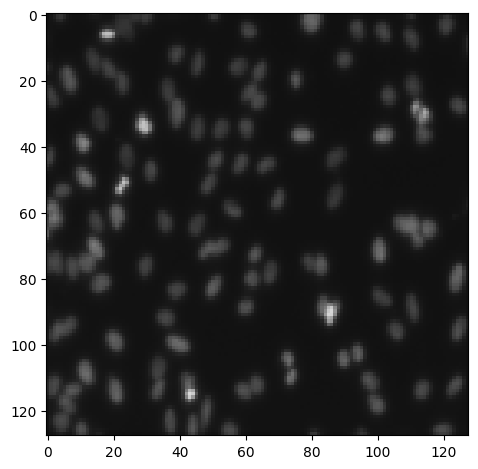

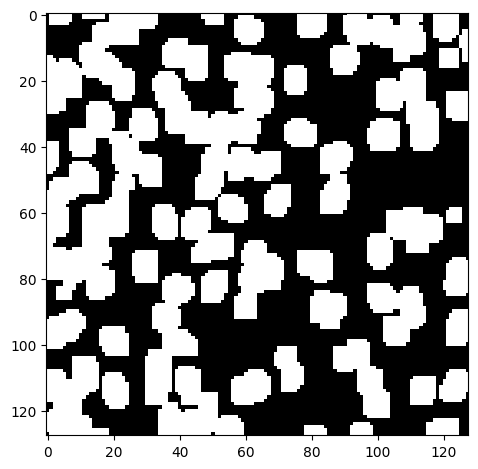

c:\Users\Ivan\Desktop\School\4th year - 1st sem\4103 intelligent systems\final\Forked from Gerard repo\venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


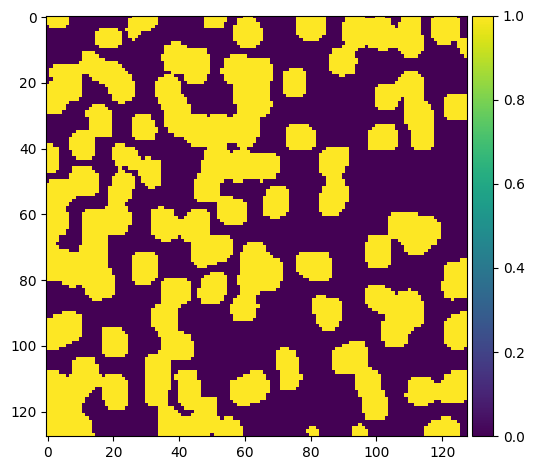

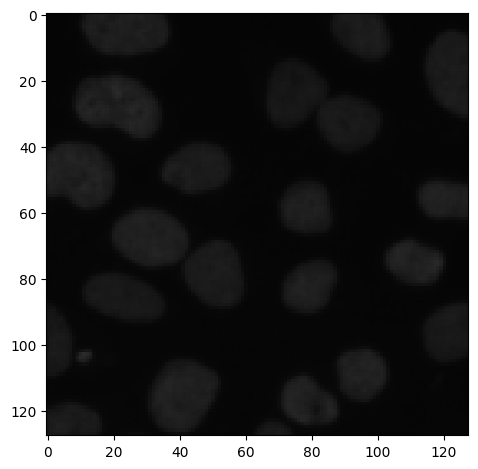

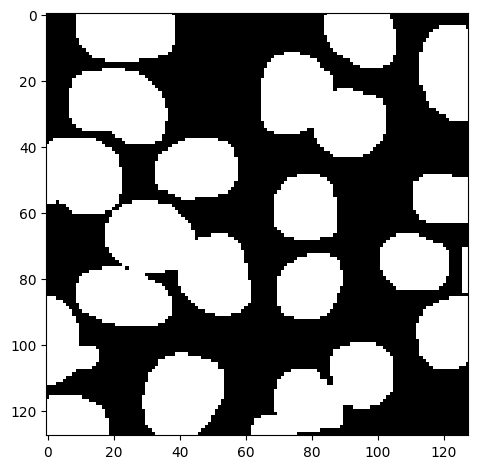

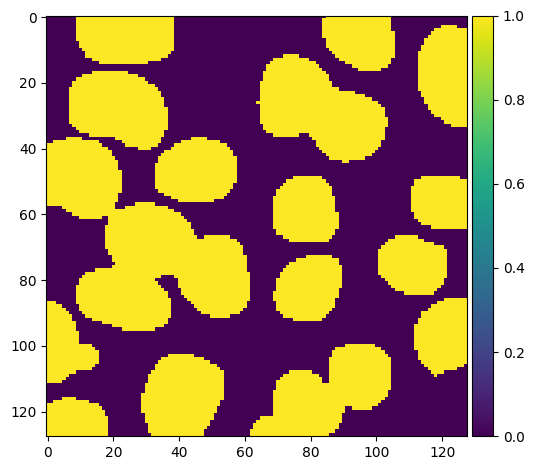

In [18]:
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()